#Requeriments

In [ ]:
#installs

!pip install biopython
!pip install logomaker
!pip install bioservices
!pip install -q condacolab
import condacolab
condacolab.install()
!conda install -c bioconda kallisto -y

In [ ]:
#imports

import pandas as pd
from Bio import SeqIO
from Bio import motifs
import matplotlib.patheffects
import matplotlib.pyplot as plt
%matplotlib inline
plt.ion()
import numpy as np
import logomaker as lm
import math
from bioservices import KEGG
import re

#Estudando as sequencias 5'UTR de levedura.

https://www.ncbi.nlm.nih.gov/datasets/genome/GCF_000146045.2/

baixar o arquivo .fasta(contem a sequencia) + gff(contem as anotações)

In [ ]:
!unzip /content/ncbi_data.zip

Archive:  /content/ncbi_data.zip
  inflating: README.md               
  inflating: ncbi_dataset/data/data_summary.tsv  
  inflating: ncbi_dataset/data/assembly_data_report.jsonl  
  inflating: ncbi_dataset/data/GCF_000146045.2/GCF_000146045.2_R64_genomic.fna  
  inflating: ncbi_dataset/data/GCF_000146045.2/genomic.gff  
  inflating: ncbi_dataset/data/dataset_catalog.json  


Importanto arquivo GFF da levedura SC.

Lendo o arquivo GFF e pulando as primeiras 8 linhas:

gff-version 3
!gff-spec-version 1.21

!processor NCBI annotwriter

!genome-build R64

!genome-build-accession NCBI_Assembly:GCF_000146045.2

!annotation-source SGD R64-3-1

sequence-region NC_001133.9 1 230218

species https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=559292:

In [ ]:
import pandas as pd

df = pd.read_csv('/content/ncbi_dataset/data/GCF_000146045.2/genomic.gff', skiprows = 8, sep = '\t', header = None)
df

0       1                      2        3         4    5  \
0      NC_001133.9  RefSeq                 region      1.0  230218.0    .   
1      NC_001133.9  RefSeq               telomere      1.0     801.0    .   
2      NC_001133.9  RefSeq  origin_of_replication    707.0     776.0    .   
3      NC_001133.9  RefSeq                   gene   1807.0    2169.0    .   
4      NC_001133.9  RefSeq                   mRNA   1807.0    2169.0    .   
...            ...     ...                    ...      ...       ...  ...   
27098  NC_001224.1  RefSeq                   exon  85035.0   85112.0    .   
27099  NC_001224.1  RefSeq                   gene  85295.0   85777.0    .   
27100  NC_001224.1  RefSeq                  ncRNA  85295.0   85777.0    .   
27101  NC_001224.1  RefSeq                   exon  85295.0   85777.0    .   
27102          ###     NaN                    NaN      NaN       NaN  NaN   

         6    7                                                  8  
0        +    .  ID=NC_001133.9:1..230218;Dbxref=taxon:559292;N...  
1        -    .  ID=id-NC_001133.9:1..801;Dbxref=SGD:S000028862...  
2        +    .  ID=id-NC_001133.9:707..776;Dbxref=SGD:S0001212...  
3        -    .  ID=gene-YAL068C;Dbxref=GeneID:851229;Name=PAU8...  
4        -    .  ID=rna-NM_001180043.1;Parent=gene-YAL068C;Dbxr...  
...    ...  ...                                                ...  
27098    +    .  ID=exon-tM(CAU)Q2-1;Parent=rna-tM(CAU)Q2;Dbxre...  
27099    +    .  ID=gene-Q0285;Dbxref=GeneID:9164989,SGD:S00002...  
27100    +    .  ID=rna-Q0285;Parent=gene-Q0285;Dbxref=GeneID:9...  
27101    +    .  ID=exon-Q0285-1;Parent=rna-Q0285;Dbxref=GeneID...  
27102  NaN  NaN                                                NaN  

[27103 rows x 9 columns]

adicionando o nome nas colunas

In [ ]:
# Define os nomes das colunas
col_names = ['seq_ID', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes']

# Adiciona os nomes das colunas ao dataframe
df.columns = col_names

# Imprime o dataframe com as colunas nomeadas
df

seq_ID  source                   type    start       end score  \
0      NC_001133.9  RefSeq                 region      1.0  230218.0     .   
1      NC_001133.9  RefSeq               telomere      1.0     801.0     .   
2      NC_001133.9  RefSeq  origin_of_replication    707.0     776.0     .   
3      NC_001133.9  RefSeq                   gene   1807.0    2169.0     .   
4      NC_001133.9  RefSeq                   mRNA   1807.0    2169.0     .   
...            ...     ...                    ...      ...       ...   ...   
27098  NC_001224.1  RefSeq                   exon  85035.0   85112.0     .   
27099  NC_001224.1  RefSeq                   gene  85295.0   85777.0     .   
27100  NC_001224.1  RefSeq                  ncRNA  85295.0   85777.0     .   
27101  NC_001224.1  RefSeq                   exon  85295.0   85777.0     .   
27102          ###     NaN                    NaN      NaN       NaN   NaN   

      strand phase                                         attributes  
0          +     .  ID=NC_001133.9:1..230218;Dbxref=taxon:559292;N...  
1          -     .  ID=id-NC_001133.9:1..801;Dbxref=SGD:S000028862...  
2          +     .  ID=id-NC_001133.9:707..776;Dbxref=SGD:S0001212...  
3          -     .  ID=gene-YAL068C;Dbxref=GeneID:851229;Name=PAU8...  
4          -     .  ID=rna-NM_001180043.1;Parent=gene-YAL068C;Dbxr...  
...      ...   ...                                                ...  
27098      +     .  ID=exon-tM(CAU)Q2-1;Parent=rna-tM(CAU)Q2;Dbxre...  
27099      +     .  ID=gene-Q0285;Dbxref=GeneID:9164989,SGD:S00002...  
27100      +     .  ID=rna-Q0285;Parent=gene-Q0285;Dbxref=GeneID:9...  
27101      +     .  ID=exon-Q0285-1;Parent=rna-Q0285;Dbxref=GeneID...  
27102    NaN   NaN                                                NaN  

[27103 rows x 9 columns]

Pegando apenas nos 5' UTR dos genes

In [ ]:
df.type.unique()

array(['region', 'telomere', 'origin_of_replication', 'gene', 'mRNA',
       'exon', 'CDS', 'long_terminal_repeat', 'regulatory_region',
       'ncRNA', 'tRNA', 'snoRNA', 'centromere', 'mobile_genetic_element',
       'pseudogene', nan, 'antisense_RNA', 'telomerase_RNA',
       'sequence_feature', 'snRNA', 'RNase_P_RNA', 'SRP_RNA',
       'transcript', 'rRNA', 'RNase_MRP_RNA'], dtype=object)

ele não possui a região 5' UTR marcada. Posso criar essa coluna do DF utilizando as posições do CDS.

correr o df[type] == CDS, pegar a start position - (tamanho da 5'UTR).

O tamanho na levedura da 5'-UTR é na média 53 pb. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5820134/#:~:text=The%20length%20of%205%E2%80%B2%20untranslated,%E2%80%93218%20nucleotides%20.



In [ ]:
#aplicar as condições para cada strand + e -.
#aprendi a usar dois ifs dentro de um apply dentro do segundo else.

df["5UTR"] = df.apply(lambda row: row['start'] - 53 if row['type'] == 'CDS' and row['strand'] == '+'
                      else (row['end'] + 53 if row['type'] == 'CDS' and row['strand'] == '-'  else 'N.A.'), axis=1)

In [ ]:
df.loc[df['type'] == 'CDS'].head(5)

seq_ID  source type    start      end score strand phase  \
6   NC_001133.9  RefSeq  CDS   1807.0   2169.0     .      -     0   
10  NC_001133.9  RefSeq  CDS   2480.0   2707.0     .      +     0   
14  NC_001133.9  RefSeq  CDS   7235.0   9016.0     .      -     0   
19  NC_001133.9  RefSeq  CDS  11565.0  11951.0     .      -     0   
23  NC_001133.9  RefSeq  CDS  12046.0  12426.0     .      +     0   

                                           attributes     5UTR  
6   ID=cds-NP_009332.1;Parent=rna-NM_001180043.1;D...   2222.0  
10  ID=cds-NP_878038.1;Parent=rna-NM_001184582.1;D...   2427.0  
14  ID=cds-NP_009333.1;Parent=rna-NM_001178208.1;D...   9069.0  
19  ID=cds-NP_009335.1;Parent=rna-NM_001179897.1;D...  12004.0  
23  ID=cds-NP_009336.1;Parent=rna-NM_001180042.1;D...  11993.0

Agora vou pegar a sequencia dessas regiões lá no meu arquivo fasta e add esses 53 nucleotídeos nesse meu df.

In [ ]:
!pip install biopython    #instalar biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 36.1 MB/s eta 0:00:00


In [ ]:
from Bio import SeqIO

fasta_file = "/content/ncbi_dataset/data/GCF_000146045.2/GCF_000146045.2_R64_genomic.fna"

# ler meu arquivo FASTA e extrair as sequências
records = SeqIO.parse(fasta_file, "fasta")


In [ ]:
for record in SeqIO.parse(fasta_file, "fasta"):
    print(record.id)
    print(record.seq[0:100])

NC_001133.9
ccacaccacacccacacacccacacaccacaccacacaccacaccacacccacacacacacatCCTAACACTACCCTAACACAGCCCTAATCTAACCCTG
NC_001134.8
AAATAGCCCTCATGTACGTCTCCTCCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGCTACTTACtacctttattttatgtttactttttata
NC_001135.5
cccacacaccacacccacaccacacccacacaccacacacaccacacccacacacccacaccacaccacacccacaccacacccacacacccacacccac
NC_001136.10
acaccacacccacaccacacccacacacaccacacccacacaccacacccacacccacacacccacacccacacaccacacaccacaccacaccacaccc
NC_001137.3
CGTCTCCTCCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGCTACTTACtacctttattttatgtttactttttatagaTTGTCTTTTTATCC
NC_001138.5
GATCTCGCAAGTGCATTCCTAGACTTAATTCATATCTGCTCCTCAACTGTCGATGATGCCTGCTAAACTGCAGCTTGACGTACTGCGGACCCTGCAGTCC
NC_001139.9
ccacacccacacacaccacacccacacccacacactACCCTAACACTACCCTAACCCTATTCTAACCCAGATCAACCTTCTCACAACTTACCCTCCATTA
NC_001140.6
cccacacacaccacacccacacaccacacccacactTTTCACATCTACCTCTACTCTCGCTGTCACTCCTTACCCGGCTTTCTGAccgaaattaaaaaaa
NC_001141.2
cacacacaccacacccacaccacaccacaccacacccacacccacacacaccacacccacacaccacacccacaccaaCTCTC

usando o seq ID eu consigo acessar a sequência dentro do SeqIO.parse

In [ ]:
df['seq_ID'].unique()

array(['NC_001133.9', '##sequence-region NC_001134.8 1 813184',
       '##species https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=559292',
       'NC_001134.8', '##sequence-region NC_001135.5 1 316620',
       'NC_001135.5', '##sequence-region NC_001136.10 1 1531933',
       'NC_001136.10', '##sequence-region NC_001137.3 1 576874',
       'NC_001137.3', '##sequence-region NC_001138.5 1 270161',
       'NC_001138.5', '##sequence-region NC_001139.9 1 1090940',
       'NC_001139.9', '##sequence-region NC_001140.6 1 562643',
       'NC_001140.6', '##sequence-region NC_001141.2 1 439888',
       'NC_001141.2', '##sequence-region NC_001142.9 1 745751',
       'NC_001142.9', '##sequence-region NC_001143.9 1 666816',
       'NC_001143.9', '##sequence-region NC_001144.5 1 1078177',
       'NC_001144.5', '##sequence-region NC_001145.3 1 924431',
       'NC_001145.3', '##sequence-region NC_001146.8 1 784333',
       'NC_001146.8', '##sequence-region NC_001147.6 1 1091291',
       'NC_

crio uma biblioteca contendo os seq ID e a sequência a partir do biopython

In [ ]:
record_dict = SeqIO.to_dict(SeqIO.parse(fasta_file, "fasta"))
print(record_dict['NC_001133.9'])  # use any record ID

ID: NC_001133.9
Name: NC_001133.9
Description: NC_001133.9 Saccharomyces cerevisiae S288C chromosome I, complete sequence
Number of features: 0
Seq('ccacaccacacccacacacccacacaccacaccacacaccacaccacacccaca...ggg')


Com isso eu consigo acessar as posições dentro da sequencia de cada ID.

In [ ]:
record_dict['NC_001133.9'].seq[200:205]

Seq('ACTAC')

Agora com essas informações eu consigo puxar a sequência dos 5'UTR de cada CDS da minha levedura, utilizando as colunas (start e 5'UTR).

In [ ]:
df_cds = df.loc[df['type'] == 'CDS']
df_cds.head(4)

seq_ID  source type    start      end score strand phase  \
6   NC_001133.9  RefSeq  CDS   1807.0   2169.0     .      -     0   
10  NC_001133.9  RefSeq  CDS   2480.0   2707.0     .      +     0   
14  NC_001133.9  RefSeq  CDS   7235.0   9016.0     .      -     0   
19  NC_001133.9  RefSeq  CDS  11565.0  11951.0     .      -     0   

                                           attributes     5UTR  
6   ID=cds-NP_009332.1;Parent=rna-NM_001180043.1;D...   2222.0  
10  ID=cds-NP_878038.1;Parent=rna-NM_001184582.1;D...   2427.0  
14  ID=cds-NP_009333.1;Parent=rna-NM_001178208.1;D...   9069.0  
19  ID=cds-NP_009335.1;Parent=rna-NM_001179897.1;D...  12004.0

Para encontrar a sequencia do 5'UTR dentro da biblioteca de sequencias eu precisarei do seq_ID e da posição do gene.

Os genes que estão na strand == "-" precisam de atenção especial, pois você deve usar o end como referência do começo do gene. Após obter a sequência, será preciso realizar o reverse complemento dessa sequência.

In [ ]:
#poderia ter passado para int antes
#poderia ter usado  + and - no gene strand e não conferir o p start e utr

df_cds["5 UTR seq"] = df_cds.apply(lambda row: record_dict[row['seq_ID']].seq[int(row['5UTR']):int(row["start"])] if row["strand"] == "+"
                                   else record_dict[row['seq_ID']].seq[int(row["end"]):int(row['5UTR'])], axis=1)

<ipython-input-14-7820216a9d21>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cds["5 UTR seq"] = df_cds.apply(lambda row: record_dict[row['seq_ID']].seq[int(row['5UTR']):int(row["start"])] if row["strand"] == "+"


peguei as sequencias.

In [ ]:
df_cds['5 UTR seq'] = df_cds['5 UTR seq'].str.upper()
df_cds.head(3)

<ipython-input-15-2fe65eb909f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cds['5 UTR seq'] = df_cds['5 UTR seq'].str.upper()


seq_ID  source type   start     end score strand phase  \
6   NC_001133.9  RefSeq  CDS  1807.0  2169.0     .      -     0   
10  NC_001133.9  RefSeq  CDS  2480.0  2707.0     .      +     0   
14  NC_001133.9  RefSeq  CDS  7235.0  9016.0     .      -     0   

                                           attributes    5UTR  \
6   ID=cds-NP_009332.1;Parent=rna-NM_001180043.1;D...  2222.0   
10  ID=cds-NP_878038.1;Parent=rna-NM_001184582.1;D...  2427.0   
14  ID=cds-NP_009333.1;Parent=rna-NM_001178208.1;D...  9069.0   

                                            5 UTR seq  
6   (T, G, T, A, T, T, T, G, T, T, T, T, G, T, T, ...  
10  (T, G, G, A, G, T, A, C, T, G, T, T, T, T, A, ...  
14  (G, T, A, T, G, T, T, A, T, T, T, A, T, A, T, ...

In [ ]:
#reverse complement das strand in reverse direction

from Bio.Seq import Seq

df_cds['5 UTR seq'] = df_cds.apply(lambda row: str(Seq(row['5 UTR seq']).reverse_complement()) if row['strand'] == "-" else str(row['5 UTR seq']), axis=1)


<ipython-input-16-6acfa48a8898>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cds['5 UTR seq'] = df_cds.apply(lambda row: str(Seq(row['5 UTR seq']).reverse_complement()) if row['strand'] == "-" else str(row['5 UTR seq']), axis=1)


In [ ]:
df_cds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6376 entries, 6 to 27094
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   seq_ID      6376 non-null   object 
 1   source      6376 non-null   object 
 2   type        6376 non-null   object 
 3   start       6376 non-null   float64
 4   end         6376 non-null   float64
 5   score       6376 non-null   object 
 6   strand      6376 non-null   object 
 7   phase       6376 non-null   object 
 8   attributes  6376 non-null   object 
 9   5UTR        6376 non-null   object 
 10  5 UTR seq   6376 non-null   object 
dtypes: float64(2), object(9)
memory usage: 597.8+ KB


In [ ]:
df_cds['strand'].value_counts()

+    3240
-    3136
Name: strand, dtype: int64

In [ ]:
df_cds['5 UTR seq'].head(5)   #cada linha é um string em upper case.

6     TTCTTTCCTTTCCTGTTAAGCTTATATCAGCACTAACAAACAAAAC...
10    TGGAGTACTGTTTTATGGCGCTTATGTGTATTCGTATGCGCAGAAT...
14    CTATTTGTTAAAAAAAATTACAAAGAGAACTACTGCATATATAAAT...
19    TCTATCCAACATGGAGGCCACAGACTACGAATGAAGAGTCTGTCAG...
23    TGTTGGATAGACCGTAACAACATCATTCACAGTAGCCGTGGCCGTC...
Name: 5 UTR seq, dtype: object

Agora eu tenho todas as 5'UTR, dito que é 53 pb da região upstream do CDS, posso usar esses dados para entender se existem sítios conservados para estes CDSs.

Com isso:

1.   Posso agrupar os genes de determinado metabolismo e analisar os síteos desses 5'UTR
2.   Posso verificar os genes mais/menos expressos em dados de transcriptomas e analisar o 5' UTR destes genes em diferentes condições, buscando entender qual motivo é util em determinada condição.
3.   Posso verificar se genes estruturais, como RNA-POLIMERASE, apresenta algum 5'UTR conservada
4.   Posso comparar todos esses agrupamentos com outros genomas de linhagens de Saccharomyces cerevisiae, buscando diferenças entre linhagens da mesma espécies (ex: PEDRA-2 vs S288C)



#DNA MOTIFS

In [ ]:
from Bio import motifs
import matplotlib.patheffects
import matplotlib.pyplot as plt

sequences = [Seq(seq[30:45]) for seq in df_cds['5 UTR seq']]

m = motifs.create(sequences)

#m.weblogo("seq.png", format = 'png')


In [ ]:
with open('seq.txt', 'w') as arquivo:
  for seq in sequences:
    arquivo.write(str(seq) +'\n')

arquivo.close

<function TextIOWrapper.close()>

In [ ]:
#print(m)
print(m.counts)
print(m.consensus)

        0      1      2      3      4      5      6      7      8      9     10     11     12     13     14
A: 2530.00 2558.00 2559.00 2558.00 2491.00 2456.00 2600.00 2616.00 2508.00 2604.00 2480.00 2513.00 2466.00 2325.00 2366.00
C: 1149.00 1079.00 1138.00 1103.00 1154.00 1190.00 1125.00 1102.00 1120.00 1118.00 1134.00 1218.00 1177.00 1154.00 1131.00
G: 1073.00 1019.00 1004.00 1085.00 1013.00 1008.00 1035.00 940.00 1019.00 1062.00 1018.00 983.00 979.00 968.00 988.00
T: 1624.00 1720.00 1675.00 1630.00 1718.00 1722.00 1616.00 1718.00 1729.00 1592.00 1744.00 1662.00 1754.00 1929.00 1891.00

AAAAAAAAAAAAAAA


Não consegui gerar o DNA MOTIF LOGO no google colab. Por algum motivo, o png gerado pelo m.weblogo('x', format = 'png') vem crashado. Por esta razão, vou fazer uma lista e ir desenhando na mão o site do barkley: https://weblogo.berkeley.edu/logo.cgi

In [ ]:
pip install logomaker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 103.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.ion()

import logomaker as lm

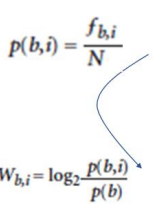

In [ ]:
#faz o mesmo que m.counts do biopython
sequences = [(seq[30:45]) for seq in df_cds['5 UTR seq']]
counts_mat = lm.alignment_to_matrix(sequences)    #it's a Position Frequency Matriz (PFM)
counts_mat.head()

A       C       G       T
pos                                
0    2530.0  1149.0  1073.0  1624.0
1    2558.0  1079.0  1019.0  1720.0
2    2559.0  1138.0  1004.0  1675.0
3    2558.0  1103.0  1085.0  1630.0
4    2491.0  1154.0  1013.0  1718.0

In [ ]:
matriz_pfm = counts_mat/counts_mat.iloc[0].sum()
matriz_pfm.head()

A         C         G         T
pos                                        
0    0.396801  0.180207  0.168287  0.254705
1    0.401192  0.169228  0.159818  0.269762
2    0.401349  0.178482  0.157465  0.262704
3    0.401192  0.172992  0.170169  0.255646
4    0.390684  0.180991  0.158877  0.269448

In [ ]:
matriz = matriz_pfm.values.tolist()
#matriz

In [ ]:
import math


altura_total_lista = []
linhas_bits = []

for linha in matriz:
    x, y, z, w = linha  # Valores da coluna A, T, C, G da linha atual

    # Verificação para evitar erro de domínio quando o valor é zero
    if x == 0:
        x = 1e-10
    if y == 0:
        y = 1e-10
    if z == 0:
        z = 1e-10
    if w == 0:
        w = 1e-10
    #print (x, y, z, w)


    altura_total = (4 *-0.25 * math.log2(0.25)) - ( -x * math.log2(x) + -y * math.log2(y) + -z * math.log2(z) + -w * math.log2(w))

    print (x*altura_total, y*altura_total, z*altura_total, w*altura_total)
    linhas_bits.append([x*altura_total, y*altura_total, z*altura_total, w*altura_total])

0.035757377075106435 0.0162392198653349 0.015165085218019448 0.022952561411056463
0.04209988001873764 0.01775831530110161 0.016770827888621446 0.028307972491098024
0.0405750416387828 0.018043922385672068 0.01591924259684952 0.026558497360281826
0.03837912164505762 0.016548933219115932 0.01627886903240325 0.024455812463426086
0.036137771312699365 0.01674146451017867 0.014695930284931538 0.02492360141116721
0.03354976498055899 0.016255790035368565 0.013769610382900432 0.02352308440412157
0.042005811854355264 0.018175591667749874 0.016721544334329885 0.026108227675630043
0.0484105403951902 0.020393125197056418 0.017395224759739595 0.03179254908216237
0.03792348750383946 0.016935528709848564 0.015408306924406864 0.026144222445828723
0.041419931242898285 0.017783211647296578 0.016892460437771883 0.02532278438505917
0.03612228602396675 0.01651720659321705 0.014827615795321832 0.025402123720079838
0.03661430333277252 0.01774620830056384 0.014322268275414003 0.02421526945446396
0.0358472979141

In [ ]:
matriz_pwm = matriz_pfm.copy()

for row in range(int(matriz_pwm.shape[0])):
  matriz_pwm.loc[row] = linhas_bits[row]

matriz_pwm = matriz_pwm.round(4)
matriz_pwm

A       C       G       T
pos                                
0    0.0358  0.0162  0.0152  0.0230
1    0.0421  0.0178  0.0168  0.0283
2    0.0406  0.0180  0.0159  0.0266
3    0.0384  0.0165  0.0163  0.0245
4    0.0361  0.0167  0.0147  0.0249
5    0.0335  0.0163  0.0138  0.0235
6    0.0420  0.0182  0.0167  0.0261
7    0.0484  0.0204  0.0174  0.0318
8    0.0379  0.0169  0.0154  0.0261
9    0.0414  0.0178  0.0169  0.0253
10   0.0361  0.0165  0.0148  0.0254
11   0.0366  0.0177  0.0143  0.0242
12   0.0358  0.0171  0.0142  0.0255
13   0.0322  0.0160  0.0134  0.0267
14   0.0333  0.0159  0.0139  0.0266

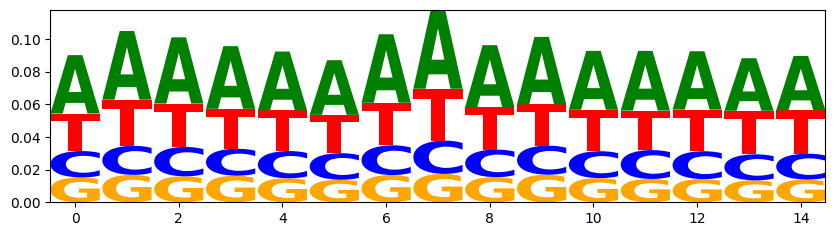

In [ ]:
lm.Logo(matriz_pwm)   #por te dado AAAAAAAAAA, que é a consensus seq m.consensus. Mas preciso confirmar.

##testando o script acima com sequencias conhecidas e passando para bits

ATACGTACGTA
ATGGGTTGGTC
ATCTATTCGTG
ATTAGTAAGTT
ATACGCGAGTA
ATCGGTCTGTG

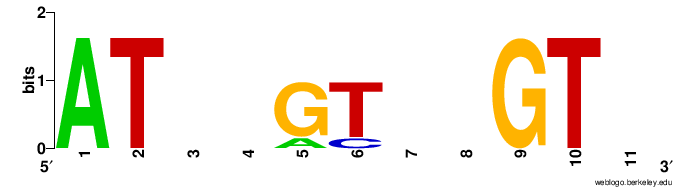

formula de bits

https://biology.stackexchange.com/questions/64368/how-to-determine-the-height-bits-in-a-sequence-logo

https://weblogo.berkeley.edu/logo.cgi

testar os logos

In [ ]:
seqs = ['ATACGTACGTA','ATGGGTTGGTC','ATCTATTCGTG','ATTAGTAAGTT','ATACGCGAGTA','ATCGGTCTGTG']
mt = motifs.create(seqs)

counts_mat = lm.alignment_to_matrix(seqs)    #it's a Position Frequency Matriz (PFM)
counts_mat.head()
total = counts_mat.iloc[0].sum()
matriz_pfm = counts_mat/total   #6375 é a soma das bases nas colunas A+C+G+T
matriz_pfm.head(7)

A         C         G         T
pos                                        
0    1.000000  0.000000  0.000000  0.000000
1    0.000000  0.000000  0.000000  1.000000
2    0.333333  0.333333  0.166667  0.166667
3    0.166667  0.333333  0.333333  0.166667
4    0.166667  0.000000  0.833333  0.000000
5    0.000000  0.166667  0.000000  0.833333
6    0.333333  0.166667  0.166667  0.333333

In [ ]:
type(matriz_pfm)

pandas.core.frame.DataFrame

In [ ]:
matriz = matriz_pfm.values.tolist()
matriz

[[1.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 1.0],
 [0.3333333333333333,
  0.3333333333333333,
  0.16666666666666666,
  0.16666666666666666],
 [0.16666666666666666,
  0.3333333333333333,
  0.3333333333333333,
  0.16666666666666666],
 [0.16666666666666666, 0.0, 0.8333333333333334, 0.0],
 [0.0, 0.16666666666666666, 0.0, 0.8333333333333334],
 [0.3333333333333333,
  0.16666666666666666,
  0.16666666666666666,
  0.3333333333333333],
 [0.3333333333333333,
  0.3333333333333333,
  0.16666666666666666,
  0.16666666666666666],
 [0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 0.0, 1.0],
 [0.3333333333333333,
  0.16666666666666666,
  0.3333333333333333,
  0.16666666666666666]]

In [ ]:
import math

altura_total_lista = []
linhas_bits = []

for linha in matriz:
    x, y, z, w = linha  # Valores da coluna A, T, C, G da linha atual

    # Verificação para evitar erro de domínio quando o valor é zero
    if x == 0:
        x = 1e-10
    if y == 0:
        y = 1e-10
    if z == 0:
        z = 1e-10
    if w == 0:
        w = 1e-10
    #print (x, y, z, w)


    altura_total = (4 *-0.25 * math.log2(0.25)) - ( -x * math.log2(x) + -y * math.log2(y) + -z * math.log2(z) + -w * math.log2(w))

    print (x*altura_total, y*altura_total, z*altura_total, w*altura_total)
    linhas_bits.append([x*altura_total, y*altura_total, z*altura_total, w*altura_total])


1.9999999900342158 1.999999990034216e-10 1.999999990034216e-10 1.999999990034216e-10
1.999999990034216e-10 1.999999990034216e-10 1.999999990034216e-10 1.9999999900342158
0.027234721981836886 0.027234721981836886 0.013617360990918443 0.013617360990918443
0.013617360990918443 0.027234721981836886 0.027234721981836886 0.013617360990918443
0.22499626195129824 1.3499775717077895e-10 1.1249813097564914 1.3499775717077895e-10
1.3499775717077895e-10 0.22499626195129824 1.3499775717077895e-10 1.1249813097564914
0.027234721981836813 0.013617360990918407 0.013617360990918407 0.027234721981836813
0.027234721981836886 0.027234721981836886 0.013617360990918443 0.013617360990918443
1.999999990034216e-10 1.999999990034216e-10 1.9999999900342158 1.999999990034216e-10
1.999999990034216e-10 1.999999990034216e-10 1.999999990034216e-10 1.9999999900342158
0.027234721981836886 0.013617360990918443 0.027234721981836886 0.013617360990918443


In [ ]:
matriz_pwm = matriz_pfm.copy()

for row in range(int(matriz_pwm.shape[0])):
  matriz_pwm.loc[row] = linhas_bits[row]

matriz_pwm = matriz_pwm.round(4)
matriz_pwm

A       C       G       T
pos                                
0    2.0000  0.0000  0.0000  0.0000
1    0.0000  0.0000  0.0000  2.0000
2    0.0272  0.0272  0.0136  0.0136
3    0.0136  0.0272  0.0272  0.0136
4    0.2250  0.0000  1.1250  0.0000
5    0.0000  0.2250  0.0000  1.1250
6    0.0272  0.0136  0.0136  0.0272
7    0.0272  0.0272  0.0136  0.0136
8    0.0000  0.0000  2.0000  0.0000
9    0.0000  0.0000  0.0000  2.0000
10   0.0272  0.0136  0.0272  0.0136

AGORA ESTÁ EM BITS

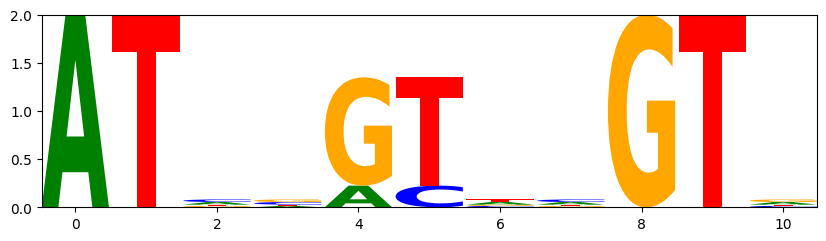

In [ ]:
lm.Logo(matriz_pwm)

#Agrupado genes de determinado metabolismo

In [ ]:
!pip install bioservices

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.9/191.9 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.9/144.9 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 68.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 26.2 MB/s eta 0:00:00
  Created wheel for bioservices: filename=bioservices-1.11.2-py3-none-any.whl size=223238 sha256=47616d27211ccad6db812b83ea97ff102f146ad3bea47fc375c6b8728ab7cf87
  Stored in directory: /root/.cache/pip/wheels/bf/ac/b3/dc05e53581bbb58641e9ac52428b89d7fc0d9ddc44f9b16456
  Created wheel for easydev: filename=easydev-0.12.1-py3-none-any.wh

In [ ]:
from bioservices import KEGG

Creating directory /root/.config/bioservices 


In [ ]:
kegg = KEGG()


Creating directory /root/.cache/bioservices 
Welcome to Bioservices
It looks like you do not have a configuration file.
We are creating one with default values in /root/.config/bioservices/bioservices.cfg .
Done


In [ ]:
result = kegg.get('sce:YAL068C')
print(result)

ENTRY       YAL068C           CDS       T00005
SYMBOL      PAU8
NAME        (RefSeq) seripauperin PAU8
ORGANISM    sce  Saccharomyces cerevisiae (budding yeast)
POSITION    I:complement(1807..2169)
MOTIF       Pfam: SRP1_TIP1
DBLINKS     NCBI-GeneID: 851229
            NCBI-ProteinID: NP_009332
            SGD: S000002142
            UniProt: P0CE93 P0CE92 Q3E770
AASEQ       120
            MVKLTSIAAGVAAIAATASATTTLAQSDERVNLVELGVYVSDIRAHLAQYYMFQAAHPTE
            TYPVEVAEAVFNYGDFTTMLTGIAPDQVTRMITGVPWYSSRLKPAISSALSKDGIYTIAN
NTSEQ       363
            atggtcaaattaacttcaatcgccgctggtgtcgctgccatcgctgctactgcttctgca
            accaccactctagctcaatctgacgaaagagtcaacttggtggaattgggtgtctacgtc
            tctgatatcagagctcacttagcccaatactacatgttccaagccgcccacccaactgaa
            acctacccagtcgaagttgctgaagccgttttcaactacggtgacttcaccaccatgttg
            accggtattgctccagaccaagtgaccagaatgatcaccggtgttccatggtactccagc
            agattaaagccagccatctccagtgctctatccaaggacggtatctacactatcgcaaac
            tag
//

In [ ]:
# Dividir o resultado em linhas
lines = result.split("\n")

# Exibir as primeiras 10 linhas
for line in lines[:10]:
    print(line)

ENTRY       YPL061W           CDS       T00005
SYMBOL      ALD6, ALD1
NAME        (RefSeq) aldehyde dehydrogenase (NADP(+)) ALD6
ORTHOLOGY   K00128  aldehyde dehydrogenase (NAD+) [EC:1.2.1.3]
ORGANISM    sce  Saccharomyces cerevisiae (budding yeast)
PATHWAY     sce00010  Glycolysis / Gluconeogenesis
            sce00053  Ascorbate and aldarate metabolism
            sce00071  Fatty acid degradation
            sce00280  Valine, leucine and isoleucine degradation
            sce00310  Lysine degradation


In [ ]:
# Percorrer as linhas e buscar as informações das vias metabólicas (linhas que começam com 'PATH')
pathways = []
for line in lines:
    if line.startswith('PATH'):
        pathways.append(line)

# Exibir as vias metabólicas em que o gene está envolvido
for pathway in pathways:
    print(pathway)

PATHWAY     sce00010  Glycolysis / Gluconeogenesis


In [ ]:
df_cds.head(1)

seq_ID  source type   start     end score strand phase  \
6  NC_001133.9  RefSeq  CDS  1807.0  2169.0     .      -     0   

                                          attributes    5UTR  \
6  ID=cds-NP_009332.1;Parent=rna-NM_001180043.1;D...  2222.0   

                                           5 UTR seq  
6  TTCTTTCCTTTCCTGTTAAGCTTATATCAGCACTAACAAACAAAAC...

pegar todos os Genes Ontology e adicionar em uma coluna.

In [ ]:
import re

# String com os dados
dados = "ID=cds-NP_009339.1;Parent=rna-NM_001178204.1;Dbxref=SGD:S000000058,GeneID:851237,Genbank:NP_009339.1;Name=NP_009339.1;Note=NADP(+)-dependent glutamate dehydrogenase%3B synthesizes glutamate from ammonia and alpha-ketoglutarate%3B rate of alpha-ketoglutarate utilization differs from Gdh1p%3B expression regulated by nitrogen and carbon sources%3B GDH3 has a paralog%2C GDH1%2C that arose from the whole genome duplication;experiment=EXISTENCE:direct assay:GO:0004354 glutamate dehydrogenase (NADP+) activity [PMID:11562373],EXISTENCE:direct assay:GO:0005634 nucleus [PMID:4126],EXISTENCE:direct assay:GO:0005739 mitochondrion [PMID:14576278|PMID:16823961],EXISTENCE:mutant phenotype:GO:0004354 glutamate dehydrogenase (NADP+) activity [PMID:9287019],EXISTENCE:mutant phenotype:GO:0006537 glutamate biosynthetic process [PMID:9287019];gbkey=CDS;gene=GDH3;locus_tag=YAL062W;product=glutamate dehydrogenase (NADP(+)) GDH3;protein_id=NP_009339.1"
# Expressão regular para encontrar os termos GO
padrao = r'GO:\d+'

# Encontrar todos os termos GO na string
termos_go = re.findall(padrao, dados)

# Imprimir os termos GO encontrados
print(termos_go)


['GO:0004354', 'GO:0005634', 'GO:0005739', 'GO:0004354', 'GO:0006537']


In [ ]:
padrao = r'GO:\d+'
GO = []

for infos in df_cds['attributes']:
  GO.append(re.findall(padrao, infos))

df_cds['GO'] = GO

df_cds.head(1)

<ipython-input-99-72cd8de35ecd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cds['GO'] = GO


seq_ID  source type   start     end score strand phase  \
6  NC_001133.9  RefSeq  CDS  1807.0  2169.0     .      -     0   

                                          attributes    5UTR  \
6  ID=cds-NP_009332.1;Parent=rna-NM_001180043.1;D...  2222.0   

                                           5 UTR seq            GO  
6  TTCTTTCCTTTCCTGTTAAGCTTATATCAGCACTAACAAACAAAAC...  [GO:0030437]

Pegar o locus tag para pesquisar no KEGG.

In [ ]:
padrao = r"locus_tag=([^\s;]+)"
Locus = []

for infos in df_cds['attributes']:
  Locus.append(re.findall(padrao, infos))

df_cds['Locus'] = Locus
df_cds.head(1)

<ipython-input-107-1aa0ac11f1f1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cds['Locus'] = Locus


seq_ID  source type   start     end score strand phase  \
6  NC_001133.9  RefSeq  CDS  1807.0  2169.0     .      -     0   

                                          attributes    5UTR  \
6  ID=cds-NP_009332.1;Parent=rna-NM_001180043.1;D...  2222.0   

                                           5 UTR seq            GO      Locus  
6  TTCTTTCCTTTCCTGTTAAGCTTATATCAGCACTAACAAACAAAAC...  [GO:0030437]  [YAL068C]

Pesquisar o locus no Kegg para encontrar os pathways

In [ ]:
print(kegg.get('sce:YPL061W'))

ENTRY       YPL061W           CDS       T00005
SYMBOL      ALD6, ALD1
NAME        (RefSeq) aldehyde dehydrogenase (NADP(+)) ALD6
ORTHOLOGY   K00128  aldehyde dehydrogenase (NAD+) [EC:1.2.1.3]
ORGANISM    sce  Saccharomyces cerevisiae (budding yeast)
PATHWAY     sce00010  Glycolysis / Gluconeogenesis
            sce00053  Ascorbate and aldarate metabolism
            sce00071  Fatty acid degradation
            sce00280  Valine, leucine and isoleucine degradation
            sce00310  Lysine degradation
            sce00330  Arginine and proline metabolism
            sce00340  Histidine metabolism
            sce00380  Tryptophan metabolism
            sce00410  beta-Alanine metabolism
            sce00561  Glycerolipid metabolism
            sce00620  Pyruvate metabolism
            sce00770  Pantothenate and CoA biosynthesis
            sce01100  Metabolic pathways
            sce01110  Biosynthesis of secondary metabolites
            sce01240  Biosynthesis of cofactors
MODULE      

pegar só a informação dos pathways

In [ ]:
pathways = kegg.get_pathway_by_gene('YPL061W','sce')
pathways

{'sce00010': 'Glycolysis / Gluconeogenesis',
 'sce00053': 'Ascorbate and aldarate metabolism',
 'sce00071': 'Fatty acid degradation',
 'sce00280': 'Valine, leucine and isoleucine degradation',
 'sce00310': 'Lysine degradation',
 'sce00330': 'Arginine and proline metabolism',
 'sce00340': 'Histidine metabolism',
 'sce00380': 'Tryptophan metabolism',
 'sce00410': 'beta-Alanine metabolism',
 'sce00561': 'Glycerolipid metabolism',
 'sce00620': 'Pyruvate metabolism',
 'sce00770': 'Pantothenate and CoA biosynthesis',
 'sce01100': 'Metabolic pathways',
 'sce01110': 'Biosynthesis of secondary metabolites',
 'sce01240': 'Biosynthesis of cofactors'}

In [ ]:
pathways = []
for locus in df_cds['Locus']:
  path = kegg.get_pathway_by_gene(locus[0],'sce')
  pathways.append(path)

df_cds['Pathways'] = pathways
df_cds.head(3)


<ipython-input-147-25b991705d2d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cds['Pathways'] = pathways


seq_ID  source type   start     end score strand phase  \
6   NC_001133.9  RefSeq  CDS  1807.0  2169.0     .      -     0   
10  NC_001133.9  RefSeq  CDS  2480.0  2707.0     .      +     0   
14  NC_001133.9  RefSeq  CDS  7235.0  9016.0     .      -     0   

                                           attributes    5UTR  \
6   ID=cds-NP_009332.1;Parent=rna-NM_001180043.1;D...  2222.0   
10  ID=cds-NP_878038.1;Parent=rna-NM_001184582.1;D...  2427.0   
14  ID=cds-NP_009333.1;Parent=rna-NM_001178208.1;D...  9069.0   

                                            5 UTR seq  \
6   TTCTTTCCTTTCCTGTTAAGCTTATATCAGCACTAACAAACAAAAC...   
10  TGGAGTACTGTTTTATGGCGCTTATGTGTATTCGTATGCGCAGAAT...   
14  CTATTTGTTAAAAAAAATTACAAAGAGAACTACTGCATATATAAAT...   

                          GO        Locus Pathways  
6               [GO:0030437]    [YAL068C]     None  
10                        []  [YAL067W-A]     None  
14  [GO:0071944, GO:0055085]    [YAL067C]     None

In [ ]:
df_cds1 = df_cds.loc[df_cds['Pathways'].notna()]    #tirando as linhas/genes que não contem um GO associado.
len(df_cds1)

df_cds1.head(5)
df_cds1.to_excel('df_cds1.xlsx')    #para economizar tempo de rodar o kegg.get_pathway_by_gene que demorou 38 minutos.

In [ ]:
df_cds1 = pd.read_excel('/content/df_cds1.xlsx')
df_cds1.head(3)

Unnamed: 0       seq_ID  source type  start    end score strand  phase  \
0          45  NC_001133.9  RefSeq  CDS  31567  32940     .      +      0   
1          49  NC_001133.9  RefSeq  CDS  33448  34701     .      +      0   
2          53  NC_001133.9  RefSeq  CDS  35155  36303     .      +      0   

                                          attributes   5UTR  \
0  ID=cds-NP_009339.1;Parent=rna-NM_001178204.1;D...  31514   
1  ID=cds-NP_009340.1;Parent=rna-NM_001178203.1;D...  33395   
2  ID=cds-NP_009341.2;Parent=rna-NM_001178202.2;D...  35102   

                                           5 UTR seq  \
0  ATATATAGGGAAGTAGCAACAGTCACCGAAAAGAAAAGGTAAAAAG...   
1  ATAATAACAACAGCAATAAGAATAACAATAAATTCATTGAACATAT...   
2  GACCAAGTCAGAAAAAAAAAAAAAAAGGAACTAAAAAAAGTTTTAA...   

                                                  GO        Locus  \
0  ['GO:0004354', 'GO:0005634', 'GO:0005739', 'GO...  ['YAL062W']   
1                       ['GO:0005634', 'GO:0005737']  ['YAL061W']   
2  ['GO:0000721', 'GO:0005737', 'GO:0006066', 'GO...  ['YAL060W']   

                                            Pathways  
0  {'sce00220': 'Arginine biosynthesis', 'sce0025...  
1  {'sce00650': 'Butanoate metabolism', 'sce01110...  
2  {'sce00650': 'Butanoate metabolism', 'sce01110...

Vamos escolher alguns pathways em sce para estudar.

In [ ]:
#listar todos os pathways em saccharomyces cerevisiae
pathways = kegg.list("pathway", "sce")

print(pathways)

sce01100	Metabolic pathways - Saccharomyces cerevisiae (budding yeast)
sce01110	Biosynthesis of secondary metabolites - Saccharomyces cerevisiae (budding yeast)
sce01200	Carbon metabolism - Saccharomyces cerevisiae (budding yeast)
sce01210	2-Oxocarboxylic acid metabolism - Saccharomyces cerevisiae (budding yeast)
sce01212	Fatty acid metabolism - Saccharomyces cerevisiae (budding yeast)
sce01230	Biosynthesis of amino acids - Saccharomyces cerevisiae (budding yeast)
sce01232	Nucleotide metabolism - Saccharomyces cerevisiae (budding yeast)
sce01250	Biosynthesis of nucleotide sugars - Saccharomyces cerevisiae (budding yeast)
sce01240	Biosynthesis of cofactors - Saccharomyces cerevisiae (budding yeast)
sce00010	Glycolysis / Gluconeogenesis - Saccharomyces cerevisiae (budding yeast)
sce00020	Citrate cycle (TCA cycle) - Saccharomyces cerevisiae (budding yeast)
sce00030	Pentose phosphate pathway - Saccharomyces cerevisiae (budding yeast)
sce00040	Pentose and glucuronate interconversions - Sacc

##exemplo TCA "sce00020"

Vou escolher o sce00020. Com isso, vou pegar todos os CDS que participam deste pathway utilizando .loc

In [ ]:
cds_tca = df_cds1[df_cds1['Pathways'].str.contains('sce00220')] #salvando os cds que participam do TCA em outro df.
print(len(cds_tca))
cds_tca.head(3)

17


Unnamed: 0        seq_ID  source type   start     end score strand  \
0            45   NC_001133.9  RefSeq  CDS   31567   32940     .      +   
158        1865   NC_001134.8  RefSeq  CDS  636703  642210     .      -   
249        3200  NC_001136.10  RefSeq  CDS   70640   73918     .      -   

     phase                                         attributes    5UTR  \
0        0  ID=cds-NP_009339.1;Parent=rna-NM_001178204.1;D...   31514   
158      0  ID=cds-NP_009767.1;Parent=rna-NM_001178556.1;D...  642263   
249      0  ID=cds-NP_010066.1;Parent=rna-NM_001180275.1;D...   73971   

                                             5 UTR seq  \
0    ATATATAGGGAAGTAGCAACAGTCACCGAAAAGAAAAGGTAAAAAG...   
158  AAAATAGAAATATCTTTTTTATAGTCACAATAAATTTCAGTTTTGA...   
249  ACAAAACATACAAAACAAGGATATTAAATTCACAACAATAAAAAGA...   

                                                    GO        Locus  \
0    ['GO:0004354', 'GO:0005634', 'GO:0005739', 'GO...  ['YAL062W']   
158  ['GO:0005737', 'GO:0004039', 'GO:0004847', 'GO...  ['YBR208C']   
249  ['GO:0004352', 'GO:0005739', 'GO:0005829', 'GO...  ['YDL215C']   

                                              Pathways  
0    {'sce00220': 'Arginine biosynthesis', 'sce0025...  
158  {'sce00220': 'Arginine biosynthesis', 'sce0079...  
249  {'sce00220': 'Arginine biosynthesis', 'sce0025...

In [ ]:
#faz o mesmo que m.counts do biopython
sequences = [seq for seq in cds_tca['5 UTR seq']]
counts_mat = lm.alignment_to_matrix(sequences)    #it's a Position Frequency Matriz (PFM)
counts_mat.head()
matriz_pfm = counts_mat/counts_mat.iloc[0].sum()
matriz_pfm.head()
matriz = matriz_pfm.values.tolist()
#matriz

In [ ]:
import math


altura_total_lista = []
linhas_bits = []

for linha in matriz:
    x, y, z, w = linha  # Valores da coluna A, T, C, G da linha atual

    # Verificação para evitar erro de domínio quando o valor é zero
    if x == 0:
        x = 1e-10
    if y == 0:
        y = 1e-10
    if z == 0:
        z = 1e-10
    if w == 0:
        w = 1e-10
    #print (x, y, z, w)


    altura_total = (4 *-0.25 * math.log2(0.25)) - ( -x * math.log2(x) + -y * math.log2(y) + -z * math.log2(z) + -w * math.log2(w))

    #print (x*altura_total, y*altura_total, z*altura_total, w*altura_total)
    linhas_bits.append([x*altura_total, y*altura_total, z*altura_total, w*altura_total])

In [ ]:
matriz_pwm = matriz_pfm.copy()

for row in range(int(matriz_pwm.shape[0])):
  matriz_pwm.loc[row] = linhas_bits[row]

matriz_pwm = matriz_pwm.round(4)
matriz_pwm

A       C       G       T
pos                                
0    0.0905  0.0452  0.0226  0.0339
1    0.0226  0.0282  0.0113  0.0339
2    0.0653  0.0522  0.0131  0.0914
3    0.0769  0.0288  0.0288  0.0288
4    0.0475  0.0237  0.0158  0.0475
5    0.0282  0.0226  0.0113  0.0339
6    0.0613  0.0263  0.0175  0.0438
7    0.1483  0.0000  0.1236  0.1483
8    0.0282  0.0339  0.0113  0.0226
9    0.2506  0.0251  0.0752  0.0752
10   0.0282  0.0339  0.0113  0.0226
11   0.1570  0.0349  0.0349  0.0698
12   0.1962  0.0000  0.0785  0.3925
13   0.0475  0.0158  0.0237  0.0475
14   0.0920  0.0460  0.0153  0.1073
15   0.0339  0.0113  0.0226  0.0282
16   0.1859  0.1062  0.0000  0.1593
17   0.0524  0.0300  0.0150  0.0300
18   0.0905  0.0226  0.0339  0.0452
19   0.0905  0.0226  0.0452  0.0339
20   0.2430  0.0911  0.0000  0.1822
21   0.0263  0.0175  0.0438  0.0613
22   0.2072  0.0460  0.0230  0.1151
23   0.0920  0.0460  0.0153  0.1073
24   0.0920  0.0460  0.0153  0.1073
25   0.0905  0.0452  0.0226  0.0339
26   0.0226  0.0282  0.0113  0.0339
27   0.1805  0.0802  0.0602  0.0201
28   0.0406  0.0174  0.0232  0.0174
29   0.0161  0.0081  0.0108  0.0108
30   0.3233  0.0323  0.0323  0.1616
31   0.2072  0.0230  0.0460  0.1151
32   0.0613  0.0263  0.0175  0.0438
33   0.0905  0.0339  0.0226  0.0452
34   0.2072  0.0460  0.0230  0.1151
35   0.1073  0.0920  0.0153  0.0460
36   0.5102  0.0425  0.0425  0.1276
37   0.0051  0.0084  0.0067  0.0084
38   0.1141  0.0285  0.0285  0.0713
39   0.4597  0.0000  0.1254  0.1254
40   0.0524  0.0150  0.0300  0.0300
41   0.0914  0.0522  0.0131  0.0653
42   0.0161  0.0108  0.0081  0.0108
43   0.1073  0.0460  0.0153  0.0920
44   0.0161  0.0108  0.0108  0.0081
45   0.1570  0.0349  0.0349  0.0698
46   0.0905  0.0226  0.0339  0.0452
47   0.0232  0.0174  0.0174  0.0406
48   0.3286  0.2191  0.0000  0.0730
49   0.6576  0.0506  0.0506  0.1012
50   0.2072  0.0460  0.0230  0.1151
51   0.0524  0.0300  0.0300  0.0150
52   0.7815  0.1804  0.0601  0.0000

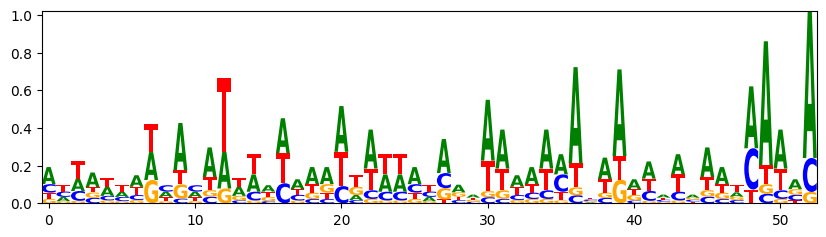

In [ ]:
lm.Logo(matriz_pwm)

In [ ]:
with open('seq.txt', 'w') as arquivo:
  for seq in sequences:
    arquivo.write(str(seq) +'\n')

arquivo.close

<function TextIOWrapper.close()>

Vou escolher o sce00020. Com isso, vou pegar todos os CDS que participam deste pathway utilizando .loc

In [ ]:
cds_aa = df_cds1[df_cds1['Pathways'].str.contains('sce01230')]
print(len(cds_aa))
cds_aa.head(3)

125


Unnamed: 0       seq_ID  source type   start     end score strand  phase  \
10         132  NC_001133.9  RefSeq  CDS   71786   73288     .      +      0   
22         250  NC_001133.9  RefSeq  CDS  130799  131983     .      +      0   
48         638  NC_001134.8  RefSeq  CDS   92414   93394     .      +      0   

                                           attributes    5UTR  \
10  ID=cds-NP_009362.1;Parent=rna-NM_001178183.1;D...   71733   
22  ID=cds-NP_009390.1;Parent=rna-NM_001178157.1;D...  130746   
48  ID=cds-NP_009485.3;Parent=rna-NM_001178308.2;D...   92361   

                                            5 UTR seq  \
10  CTCTTGTTTCTATTTACAAGACACCAATCAAAACAAATAAAACATC...   
22  CATAGACATTTGCACCTTATACATATACACACAAGACAAAACCAAA...   
48  CATAATGCACATAGACTCTCAGCTTCAACTCCACAAGGCTTCTCCA...   

                                                   GO        Locus  \
10  ['GO:0004743', 'GO:0005737', 'GO:0005886', 'GO...  ['YAL038W']   
22  ['GO:0004123', 'GO:0005634', 'GO:0005737', 'GO...  ['YAL012W']   
48  ['GO:0002189', 'GO:0005737', 'GO:0004749', 'GO...  ['YBL068W']   

                                             Pathways  
10  {'sce00010': 'Glycolysis / Gluconeogenesis', '...  
22  {'sce00260': 'Glycine, serine and threonine me...  
48  {'sce00030': 'Pentose phosphate pathway', 'sce...

In [ ]:
#faz o mesmo que m.counts do biopython
sequences = [seq for seq in cds_aa['5 UTR seq']]
counts_mat = lm.alignment_to_matrix(sequences)    #it's a Position Frequency Matriz (PFM)
counts_mat.head()
matriz_pfm = counts_mat/counts_mat.iloc[0].sum()
matriz_pfm.head()
matriz = matriz_pfm.values.tolist()
#matriz

In [ ]:
import math


altura_total_lista = []
linhas_bits = []

for linha in matriz:
    x, y, z, w = linha  # Valores da coluna A, T, C, G da linha atual

    # Verificação para evitar erro de domínio quando o valor é zero
    if x == 0:
        x = 1e-10
    if y == 0:
        y = 1e-10
    if z == 0:
        z = 1e-10
    if w == 0:
        w = 1e-10
    #print (x, y, z, w)


    altura_total = (4 *-0.25 * math.log2(0.25)) - ( -x * math.log2(x) + -y * math.log2(y) + -z * math.log2(z) + -w * math.log2(w))

    #print (x*altura_total, y*altura_total, z*altura_total, w*altura_total)
    linhas_bits.append([x*altura_total, y*altura_total, z*altura_total, w*altura_total])

In [ ]:
matriz_pwm = matriz_pfm.copy()

for row in range(int(matriz_pwm.shape[0])):
  matriz_pwm.loc[row] = linhas_bits[row]

matriz_pwm = matriz_pwm.round(4)
matriz_pwm

A       C       G       T
pos                                
0    0.0276  0.0161  0.0121  0.0283
1    0.0422  0.0221  0.0169  0.0506
2    0.0531  0.0379  0.0167  0.0820
3    0.0447  0.0229  0.0149  0.0418
4    0.0286  0.0143  0.0130  0.0254
5    0.0335  0.0171  0.0134  0.0291
6    0.0318  0.0163  0.0147  0.0341
7    0.0211  0.0113  0.0113  0.0206
8    0.0366  0.0194  0.0134  0.0239
9    0.0209  0.0156  0.0104  0.0255
10   0.0337  0.0172  0.0141  0.0329
11   0.0143  0.0083  0.0080  0.0110
12   0.0742  0.0283  0.0202  0.0458
13   0.0351  0.0161  0.0146  0.0256
14   0.0667  0.0222  0.0222  0.0523
15   0.0385  0.0238  0.0123  0.0279
16   0.0882  0.0299  0.0221  0.0567
17   0.0414  0.0159  0.0185  0.0344
18   0.0435  0.0258  0.0133  0.0284
19   0.0244  0.0114  0.0130  0.0161
20   0.0370  0.0174  0.0159  0.0203
21   0.0372  0.0159  0.0159  0.0258
22   0.0851  0.0304  0.0213  0.0532
23   0.0650  0.0233  0.0209  0.0442
24   0.0557  0.0284  0.0153  0.0371
25   0.0479  0.0258  0.0157  0.0258
26   0.0716  0.0311  0.0176  0.0487
27   0.0940  0.0392  0.0235  0.0392
28   0.0349  0.0188  0.0139  0.0195
29   0.0288  0.0113  0.0169  0.0213
30   0.0897  0.0289  0.0258  0.0456
31   0.0286  0.0130  0.0143  0.0254
32   0.0546  0.0289  0.0150  0.0353
33   0.0636  0.0324  0.0185  0.0301
34   0.1033  0.0350  0.0228  0.0578
35   0.0969  0.0535  0.0200  0.0384
36   0.0919  0.0365  0.0206  0.0491
37   0.0367  0.0179  0.0140  0.0289
38   0.1163  0.0338  0.0281  0.0563
39   0.1521  0.0409  0.0340  0.0567
40   0.0732  0.0261  0.0222  0.0418
41   0.0549  0.0307  0.0143  0.0373
42   0.0453  0.0235  0.0145  0.0299
43   0.0283  0.0199  0.0103  0.0219
44   0.1057  0.0426  0.0273  0.0375
45   0.0500  0.0230  0.0160  0.0360
46   0.0644  0.0276  0.0207  0.0310
47   0.0583  0.0241  0.0190  0.0570
48   0.1215  0.0618  0.0165  0.0576
49   0.3864  0.0598  0.0782  0.0506
50   0.2457  0.0557  0.0393  0.0688
51   0.1813  0.0473  0.0315  0.0683
52   0.6111  0.0910  0.0650  0.0455

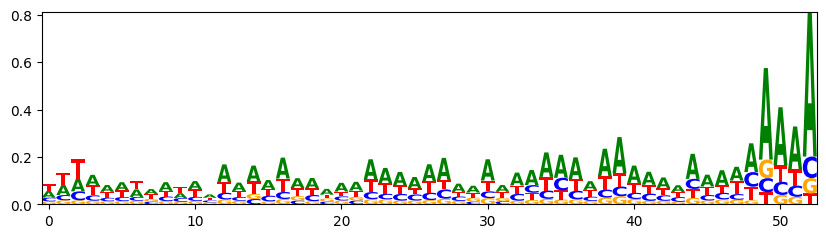

In [ ]:
lm.Logo(matriz_pwm)

In [ ]:
with open('seq.txt', 'w') as arquivo:
  for seq in sequences:
    arquivo.write(str(seq) +'\n')

arquivo.close

<function TextIOWrapper.close()>

##exemplo "sceNNN"

In [ ]:
cds_biotin = df_cds1[df_cds1['Pathways'].str.contains('sce00460')]
print(len(cds_biotin))
cds_biotin.head(3)

9


Unnamed: 0        seq_ID  source type    start      end score strand  \
177         2110   NC_001134.8  RefSeq  CDS   736264   737736     .      +   
473         5483  NC_001136.10  RefSeq  CDS  1108702  1109847     .      +   
1031       12170   NC_001141.2  RefSeq  CDS    34087    34686     .      -   

      phase                                         attributes     5UTR  \
177       0  ID=cds-NP_009822.4;Parent=rna-NM_001178611.3;D...   736211   
473       0  ID=cds-NP_010607.3;Parent=rna-NM_001180629.3;D...  1108649   
1031      0  ID=cds-NP_012102.1;Parent=rna-NM_001179512.1;D...    34739   

                                              5 UTR seq  \
177   TCAAAAATCATCAAGCCGACATTTCCACATCGAGTCTCATAGTCTT...   
473   TTGAAGACAGTGGAGGATAACAGCACTCTCATCGCACTTTTGGAAG...   
1031  TTATGACTTAGGGTTAGCCAATCACTTTTCGAGGCTACCTCTAGTT...   

                                                     GO        Locus  \
177   ['GO:0005739', 'GO:0006730', 'GO:0004372', 'GO...  ['YBR263W']   
473   ['GO:0005737', 'GO:0004067', 'GO:0004067', 'GO...  ['YDR321W']   
1031                                                 []  ['YIL164C']   

                                               Pathways  
177   {'sce00260': 'Glycine, serine and threonine me...  
473   {'sce00250': 'Alanine, aspartate and glutamate...  
1031  {'sce00380': 'Tryptophan metabolism', 'sce0046...

In [ ]:
#faz o mesmo que m.counts do biopython
sequences = [seq for seq in cds_biotin['5 UTR seq']]
counts_mat = lm.alignment_to_matrix(sequences)    #it's a Position Frequency Matriz (PFM)
counts_mat.head()
matriz_pfm = counts_mat/counts_mat.iloc[0].sum()
matriz_pfm.head()
matriz = matriz_pfm.values.tolist()
#matriz

In [ ]:
import math

altura_total_lista = []
linhas_bits = []

for linha in matriz:
    x, y, z, w = linha  # Valores da coluna A, T, C, G da linha atual

    # Verificação para evitar erro de domínio quando o valor é zero
    if x == 0:
        x = 1e-10
    if y == 0:
        y = 1e-10
    if z == 0:
        z = 1e-10
    if w == 0:
        w = 1e-10
    #print (x, y, z, w)


    altura_total = (4 *-0.25 * math.log2(0.25)) - ( -x * math.log2(x) + -y * math.log2(y) + -z * math.log2(z) + -w * math.log2(w))

    #print (x*altura_total, y*altura_total, z*altura_total, w*altura_total)
    linhas_bits.append([x*altura_total, y*altura_total, z*altura_total, w*altura_total])

In [ ]:
matriz_pwm = matriz_pfm.copy()

for row in range(int(matriz_pwm.shape[0])):
  matriz_pwm.loc[row] = linhas_bits[row]

matriz_pwm = matriz_pwm.round(4)
matriz_pwm

A       C       G       T
pos                                
0    0.5605  0.0000  0.0000  0.4484
1    0.0615  0.0615  0.0615  0.3689
2    0.2161  0.0000  0.3602  0.0720
3    0.0761  0.0380  0.0380  0.1901
4    0.2702  0.0000  0.0675  0.2702
5    0.1724  0.0000  0.5171  0.0862
6    0.2161  0.0720  0.3602  0.0000
7    0.0000  0.9612  0.0000  0.2746
8    0.1724  0.0862  0.0000  0.5171
9    0.2161  0.3602  0.0720  0.0000
10   0.0380  0.0380  0.1901  0.0761
11   0.0000  0.9612  0.2746  0.0000
12   0.0363  0.0182  0.0363  0.0726
13   0.7883  0.1126  0.0000  0.1126
14   0.1254  0.0000  0.1254  0.3136
15   0.0761  0.0380  0.0380  0.1901
16   0.2161  0.3602  0.0720  0.0000
17   0.0000  0.0720  0.2161  0.3602
18   0.1565  0.1043  0.0000  0.2087
19   0.1565  0.1043  0.0000  0.2087
20   0.2702  0.0675  0.0000  0.2702
21   0.1565  0.0000  0.2087  0.1043
22   0.0000  0.0720  0.2161  0.3602
23   0.5171  0.1724  0.0000  0.0862
24   0.7211  0.3606  0.0000  0.0000
25   0.0182  0.0363  0.0726  0.0363
26   0.1565  0.2087  0.0000  0.1043
27   0.5171  0.1724  0.0000  0.0862
28   0.5171  0.0862  0.0000  0.1724
29   0.1254  0.1254  0.0000  0.3136
30   0.0720  0.3602  0.2161  0.0000
31   0.0615  0.0615  0.0615  0.3689
32   0.0761  0.0380  0.1901  0.0380
33   0.0000  0.0000  1.3304  0.1663
34   0.0720  0.2161  0.0000  0.3602
35   0.3689  0.0615  0.0615  0.0615
36   0.1254  0.3136  0.0000  0.1254
37   0.0720  0.2161  0.0000  0.3602
38   0.1126  0.7883  0.0000  0.1126
39   0.2702  0.0000  0.0675  0.2702
40   0.2161  0.3602  0.0000  0.0720
41   0.0275  0.1099  0.0824  0.0275
42   0.5171  0.0000  0.0862  0.1724
43   0.3602  0.2161  0.0720  0.0000
44   0.0720  0.3602  0.0000  0.2161
45   0.0000  0.2702  0.0675  0.2702
46   0.1254  0.1254  0.0000  0.3136
47   0.1126  0.7883  0.1126  0.0000
48   0.1254  0.3136  0.0000  0.1254
49   0.3689  0.0615  0.0615  0.0615
50   0.7211  0.0000  0.0000  0.3606
51   0.1126  0.7883  0.0000  0.1126
52   0.2702  0.0675  0.0000  0.2702

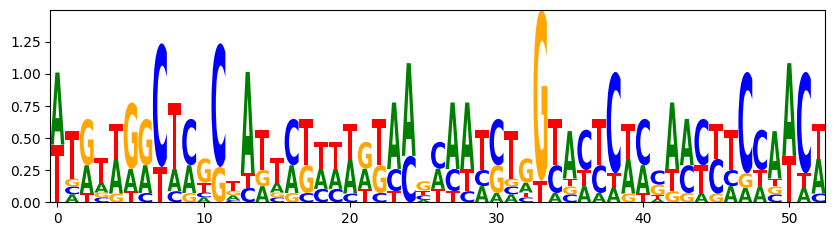

In [ ]:
j = lm.Logo(matriz_pwm)

In [ ]:
with open('seq.txt', 'w') as arquivo:
  for seq in sequences:
    arquivo.write(str(seq) +'\n')

arquivo.close

<function TextIOWrapper.close()>

#Criando todos os motifs para todos as regiões 5'UTR em todos os pathways de Saccharomyces cerevisae

Com o código acima você consegue verificar para qualquer pathway de levedura (sce) se as regiões 5' UTR possuem regiões conservadas em seus pathways.
Claramente é uma pergunta ampla e que provavelmente não deve haver explicação biológica, entretanto isso muda quando pensamos em genes autamente expressos. Visando criar a base para a aplicação em dados de transcriptoma, irei rodar esse script para todos os pathways presentes no kegg em sce.

In [ ]:
def dna_motif(df_p):    #df_p is a data frame

  import math

  sequences = [seq for seq in df_p['5 UTR seq']]
  counts_mat = lm.alignment_to_matrix(sequences)    #it's a Position Frequency Matriz (PFM)
  matriz_pfm = counts_mat/counts_mat.iloc[0].sum()
  matriz = matriz_pfm.values.tolist()

  altura_total_lista = []
  linhas_bits = []

  for linha in matriz:
      x, y, z, w = linha  # Valores da coluna A, T, C, G da linha atual

      # Verificação para evitar erro de domínio quando o valor é zero
      if x == 0:
          x = 1e-10
      if y == 0:
          y = 1e-10
      if z == 0:
          z = 1e-10
      if w == 0:
          w = 1e-10
      #print (x, y, z, w)
      altura_total = (4 *-0.25 * math.log2(0.25)) - ( -x * math.log2(x) + -y * math.log2(y) + -z * math.log2(z) + -w * math.log2(w))

      #print (x*altura_total, y*altura_total, z*altura_total, w*altura_total)
      linhas_bits.append([x*altura_total, y*altura_total, z*altura_total, w*altura_total])

  matriz_pwm = matriz_pfm.copy()

  for row in range(int(matriz_pwm.shape[0])):
    matriz_pwm.loc[row] = linhas_bits[row]

  matriz_pwm = matriz_pwm.round(4)
  logo = lm.Logo(matriz_pwm)
  return logo


<ipython-input-85-60ee98cb7930>:14: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig("/content/motifs/"+p+".png", dpi=300, format="png")
<ipython-input-85-60ee98cb7930>:14: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig("/content/motifs/"+p+".png", dpi=300, format="png")
<ipython-input-85-60ee98cb7930>:14: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig("/content/motifs/"+p+".png", dpi=300, format="png")
<ipython-input-85-60ee98cb7930>:14: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig("/content/motifs/"+p+".png", dpi=300, format="png")
<ipython-input-85-60ee98cb7930>:14: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig("/content/motifs/"+p+".png", dpi=300, format="png")
<ipython-input-85-60ee98cb7930>:14: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig("/content/motifs/"+p+".png", dpi=300, format="png")
<ipython-input-85-60ee98cb7930>:14: UserWarning: Glyph 9 (	) missing from cu

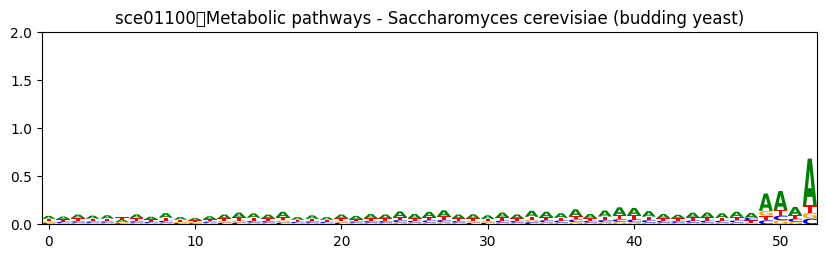

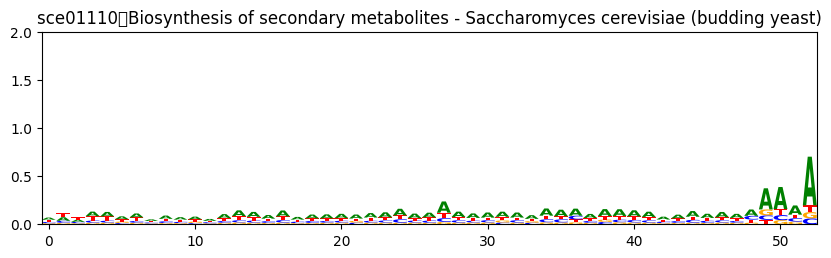

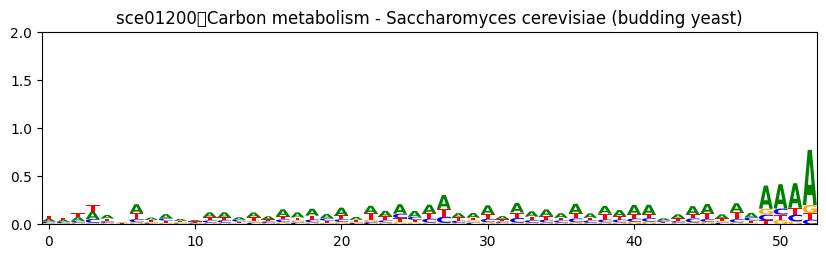

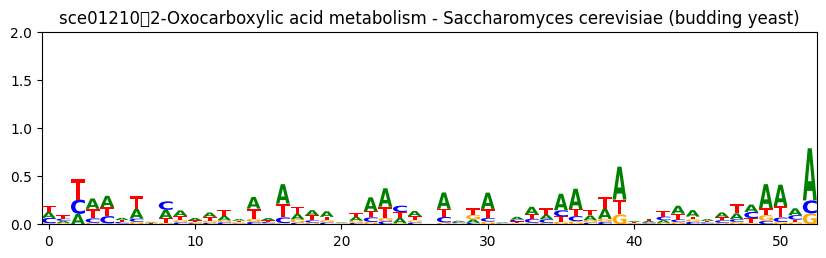

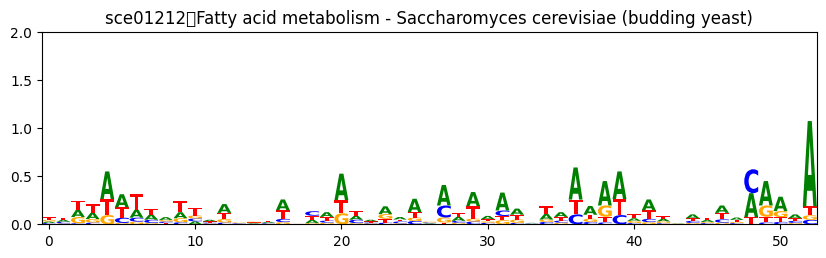

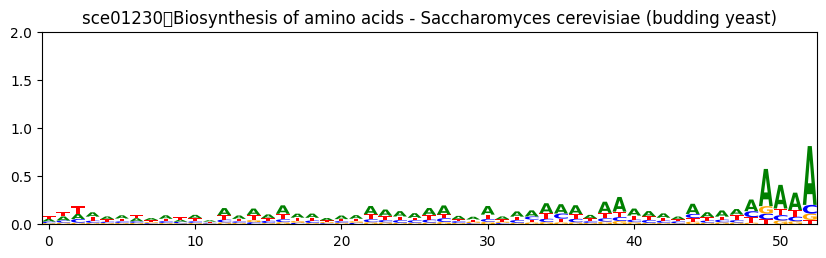

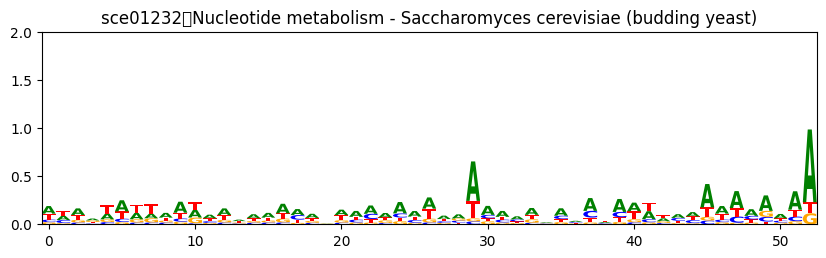

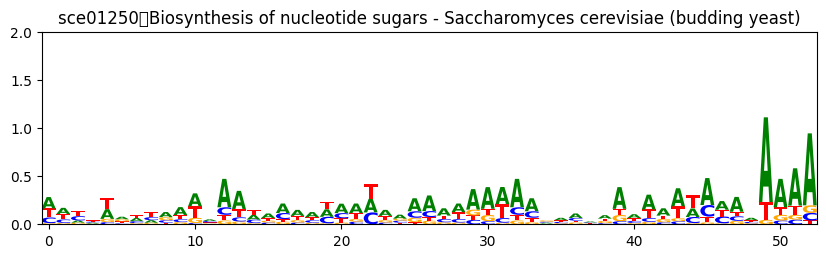

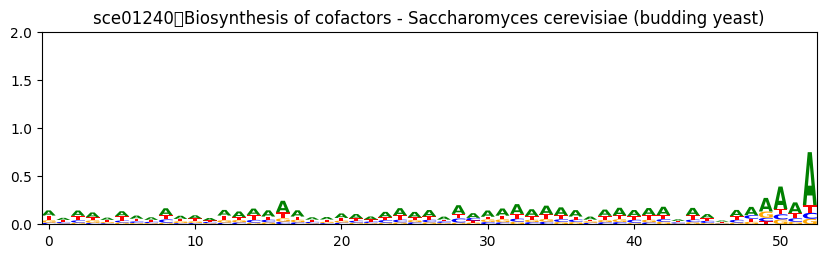

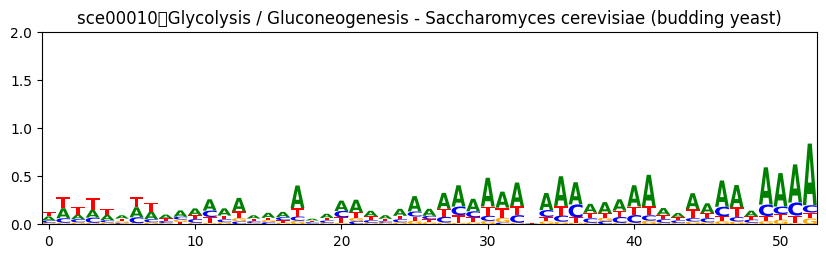

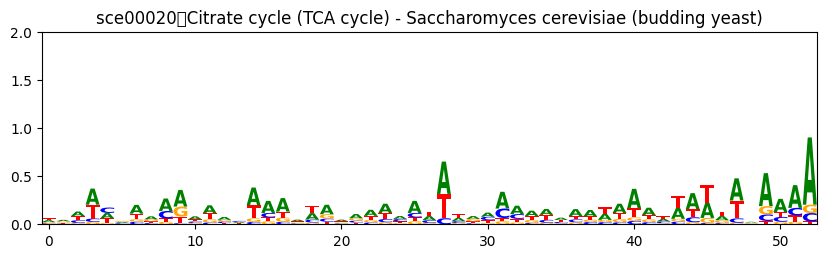

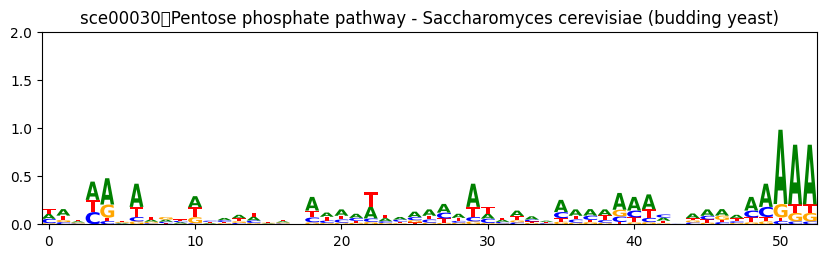

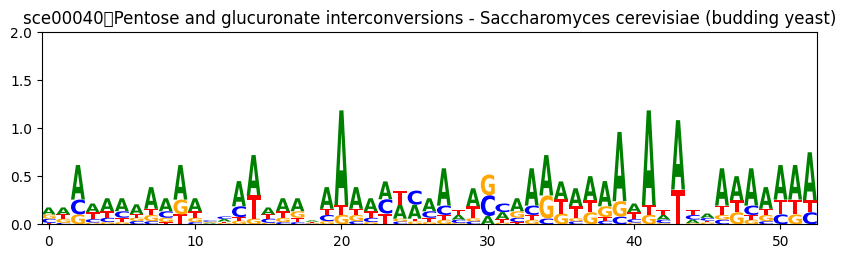

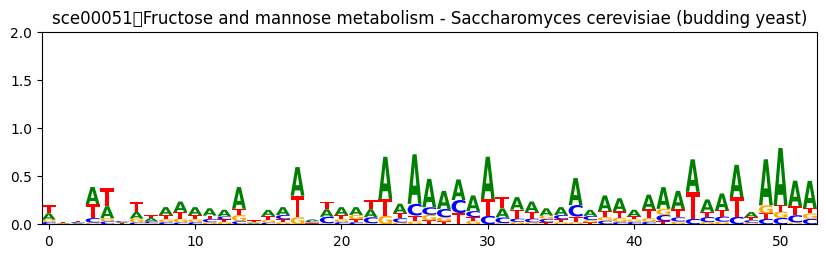

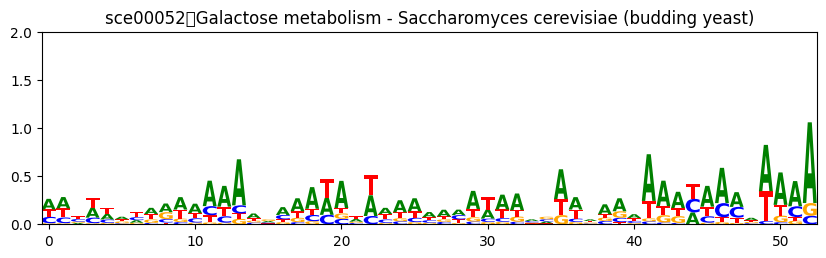

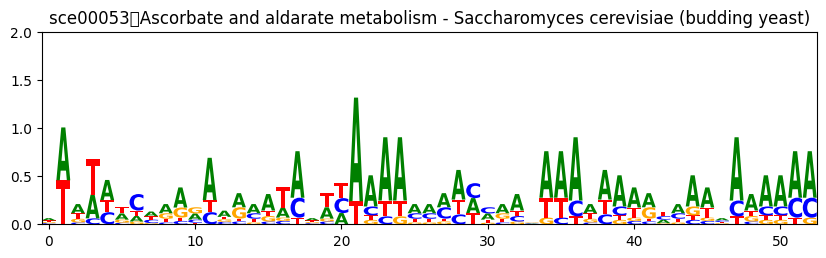

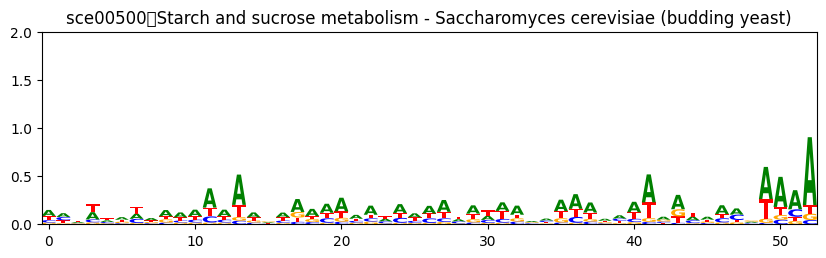

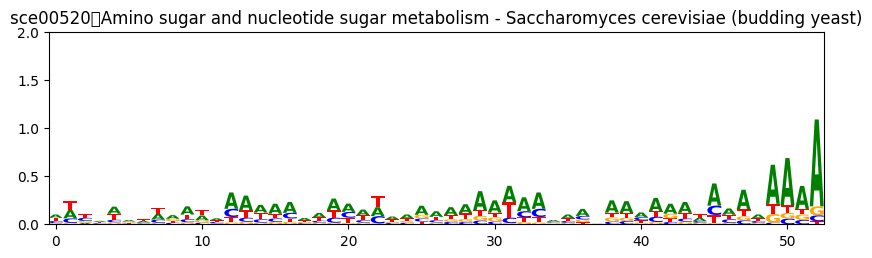

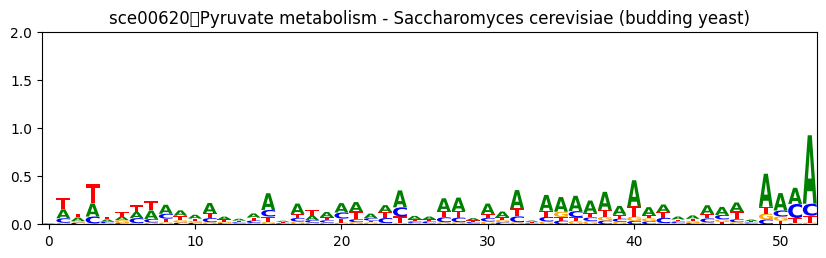

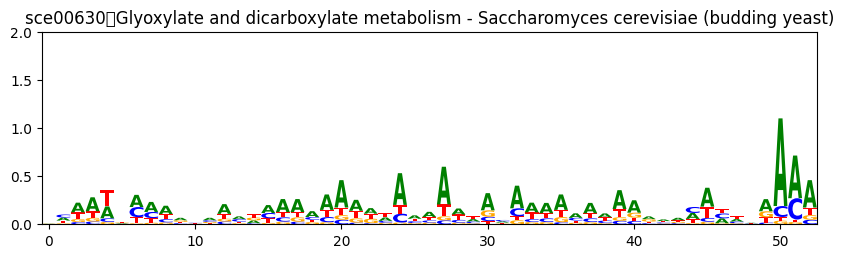

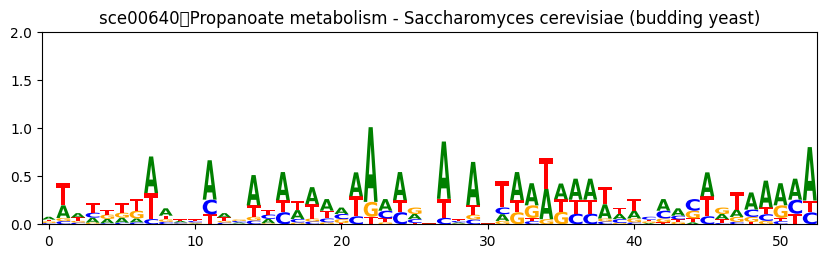

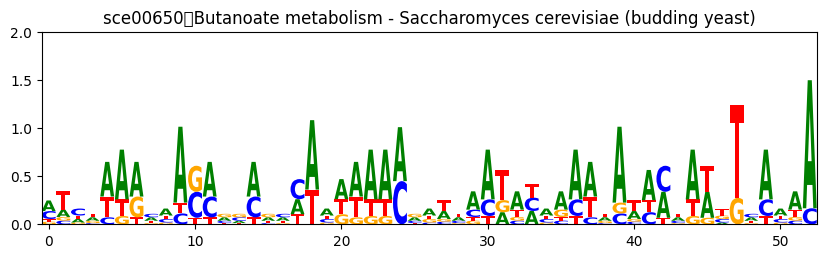

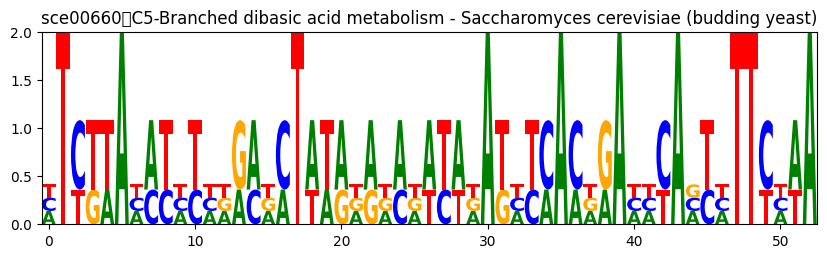

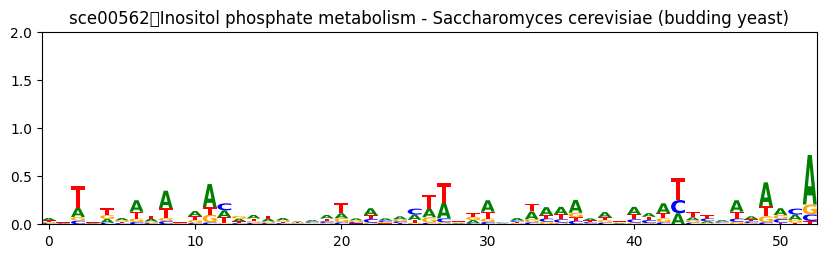

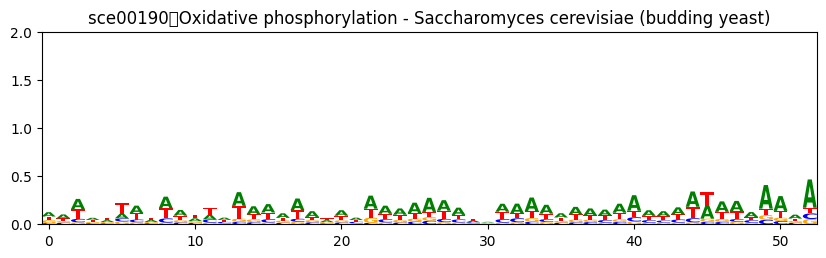

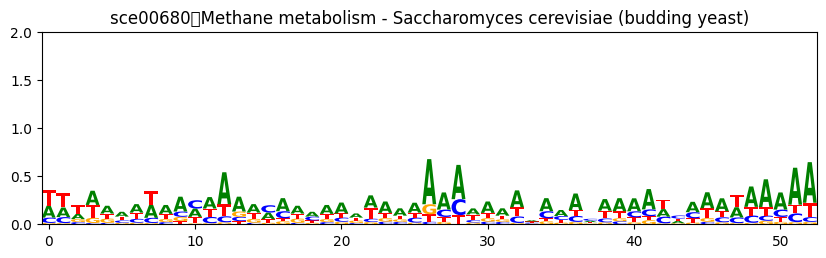

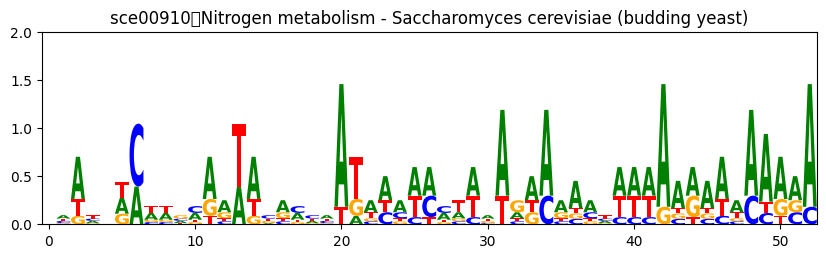

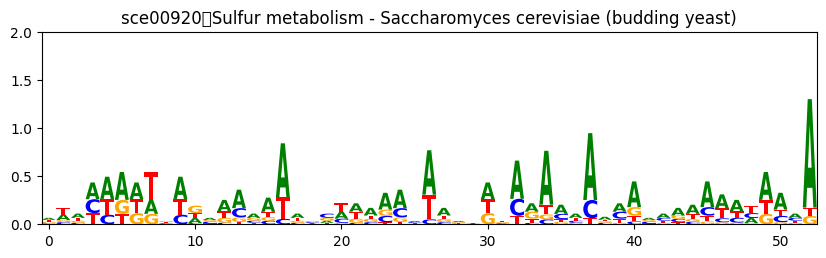

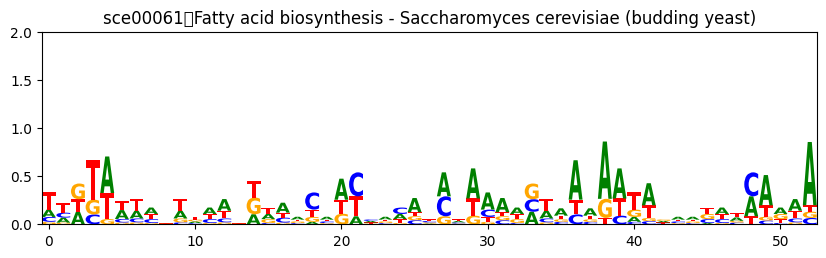

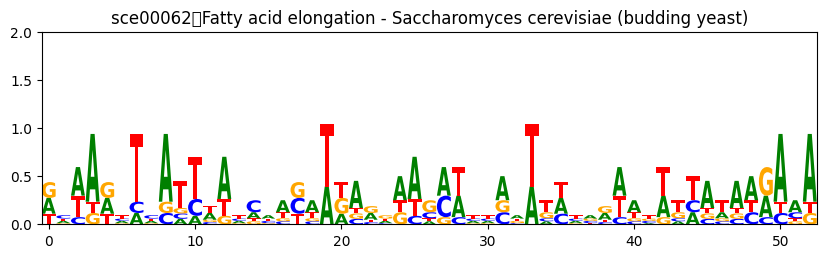

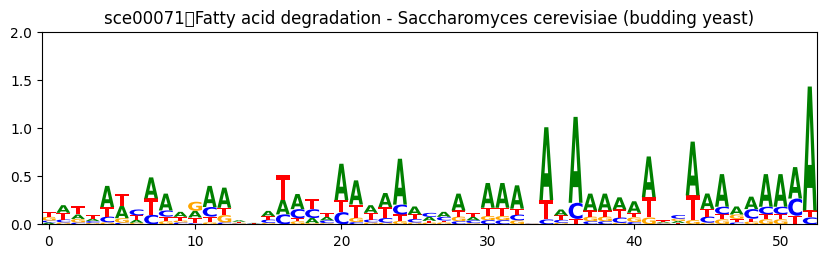

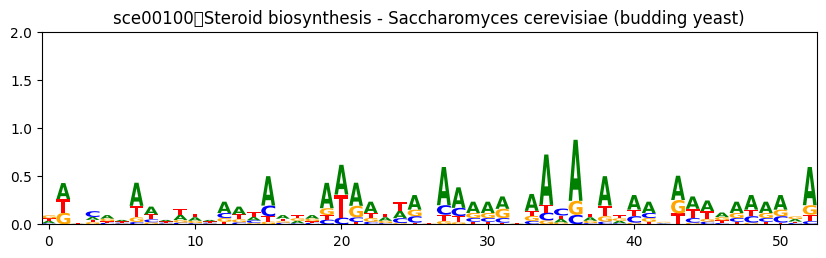

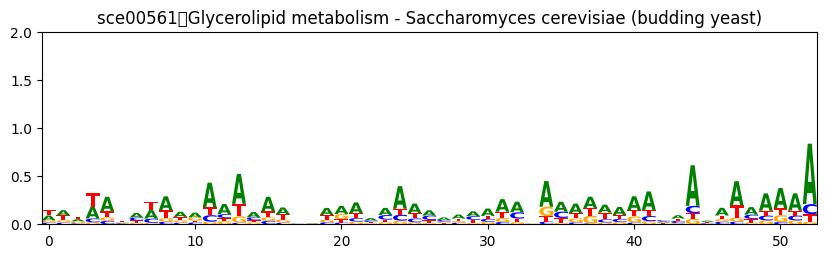

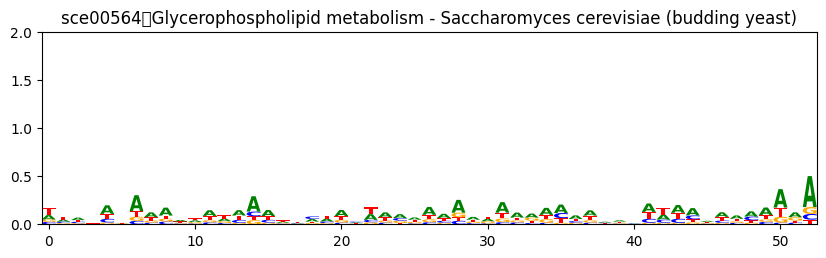

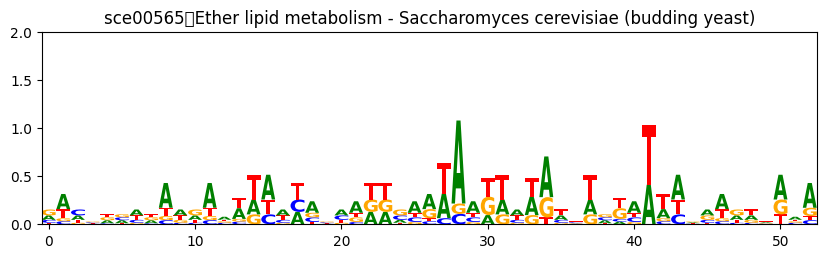

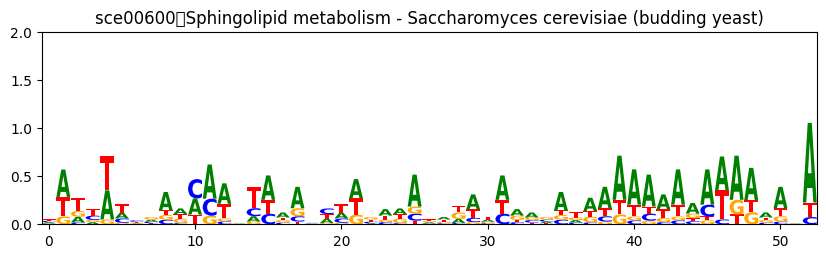

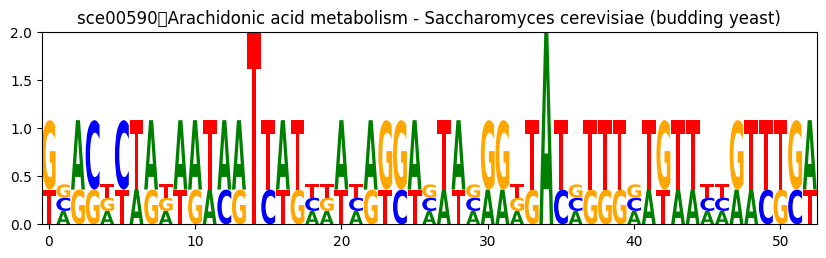

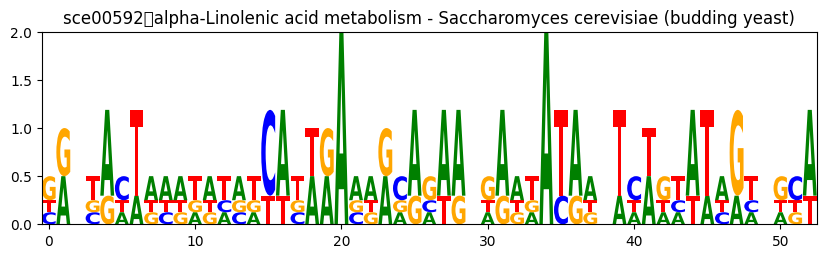

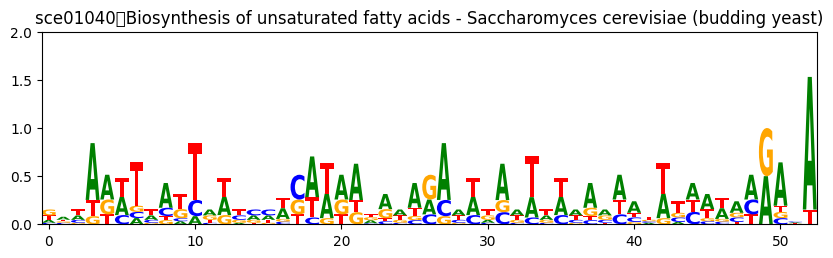

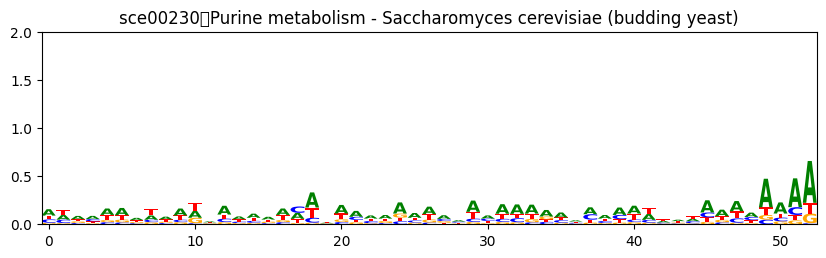

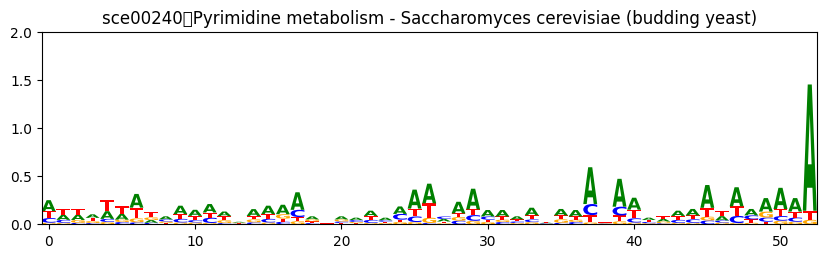

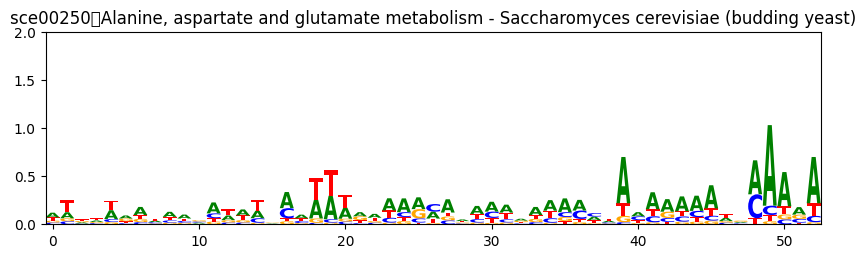

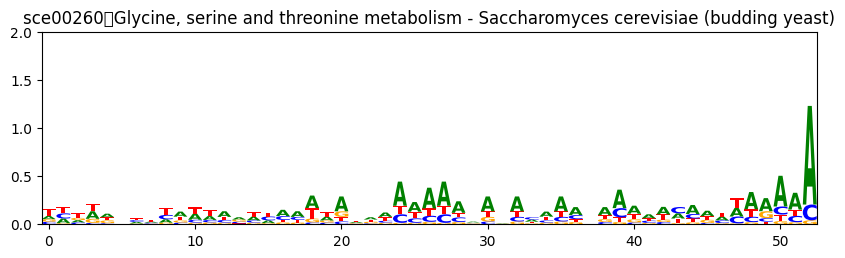

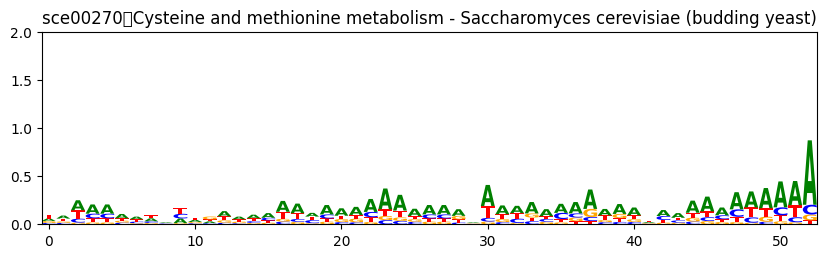

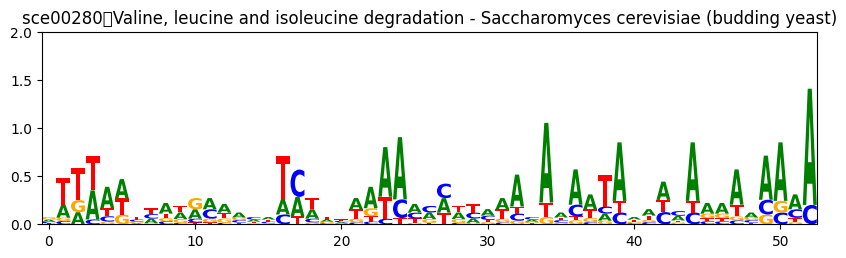

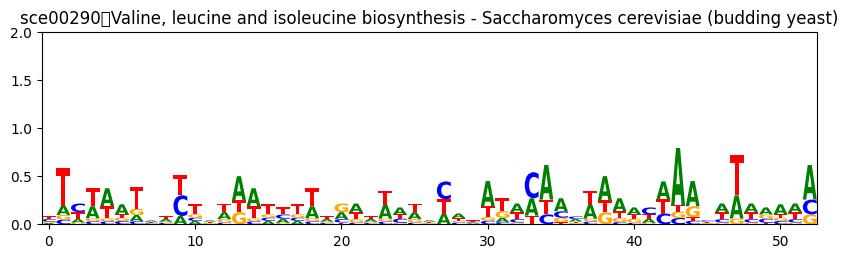

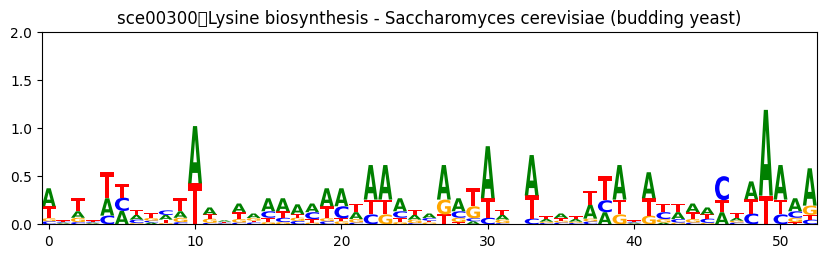

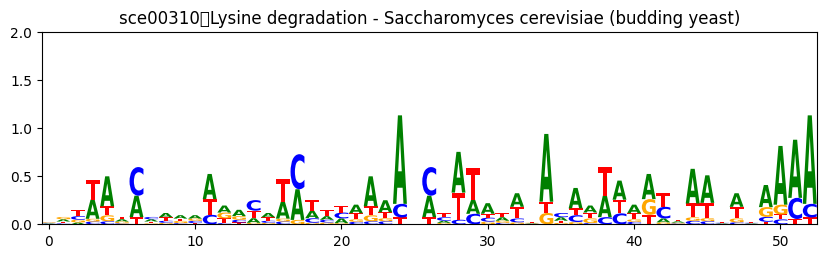

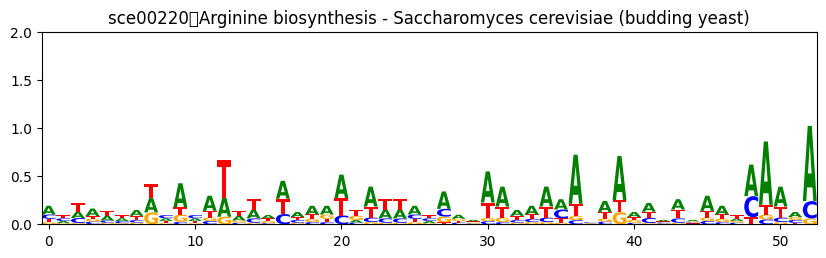

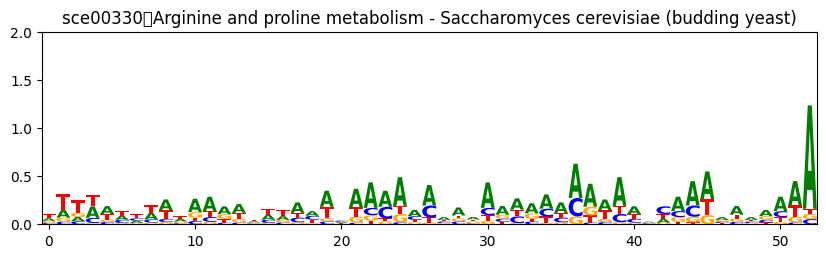

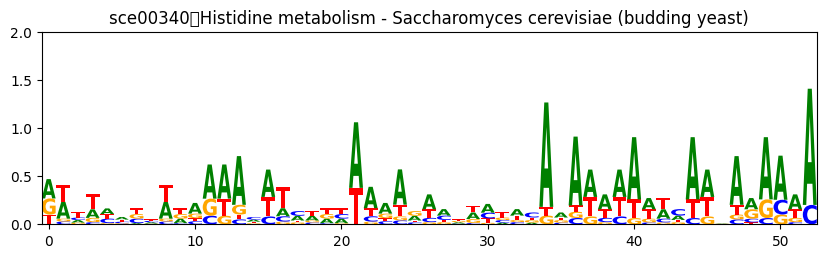

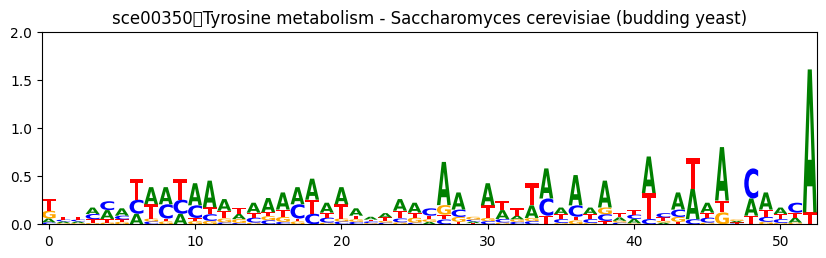

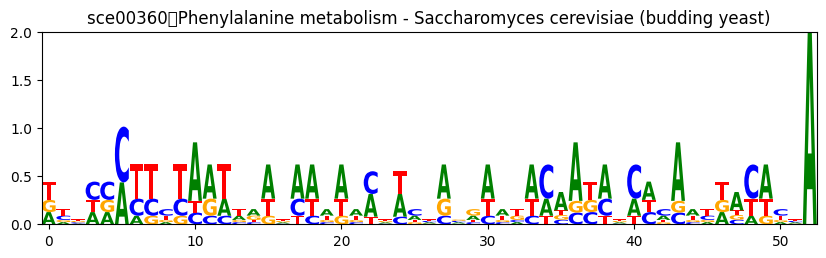

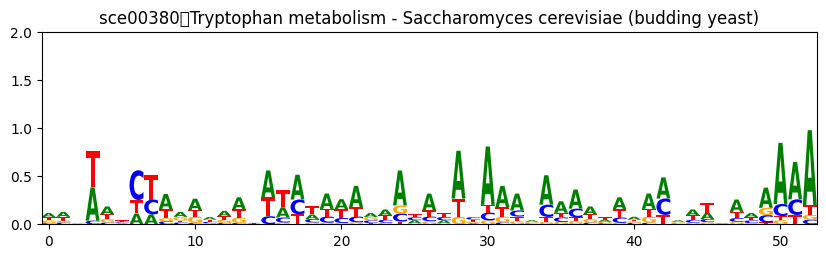

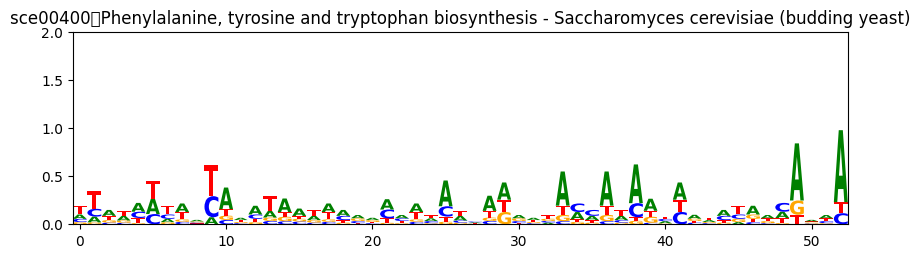

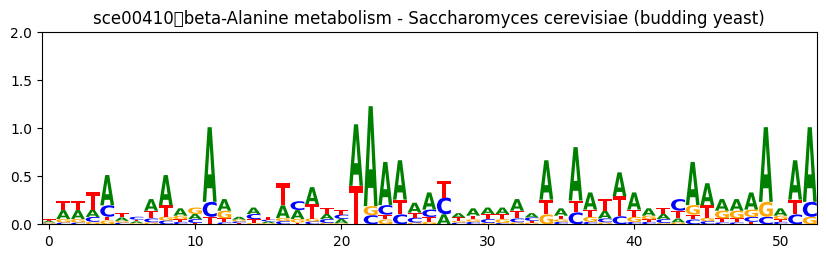

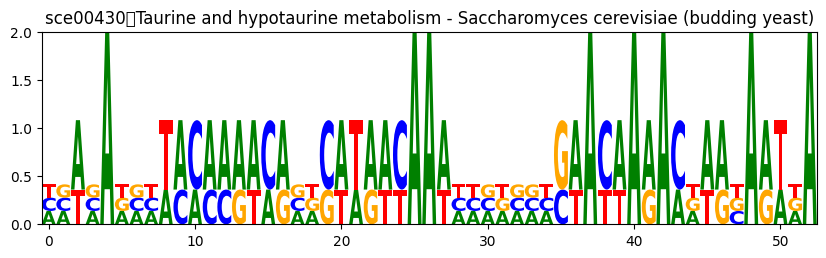

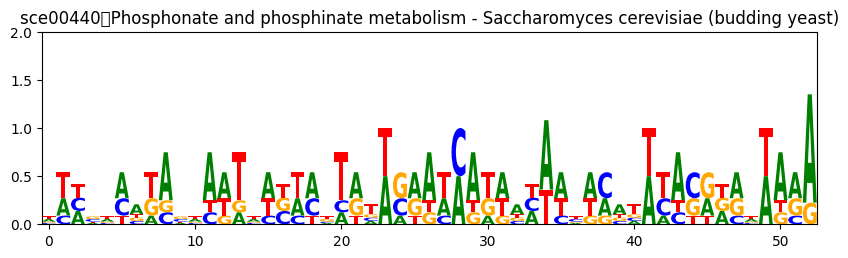

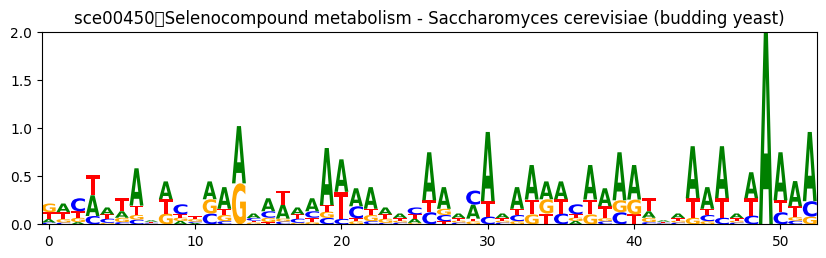

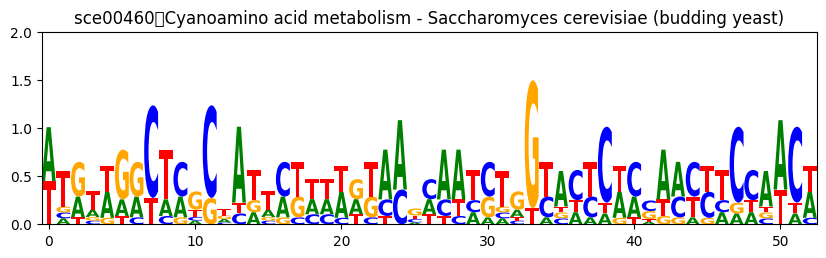

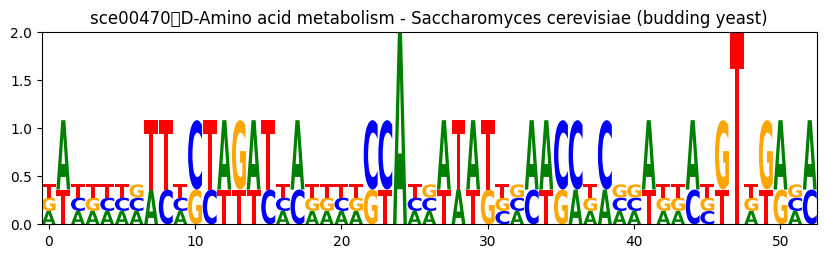

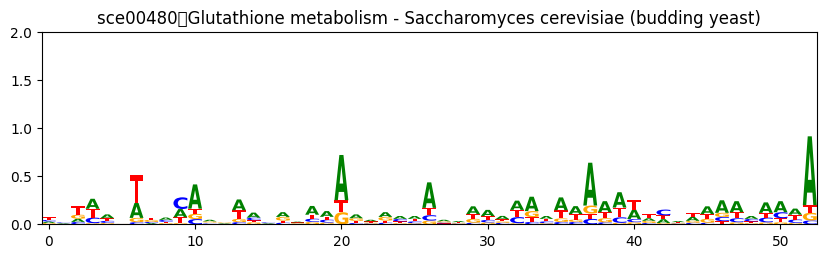

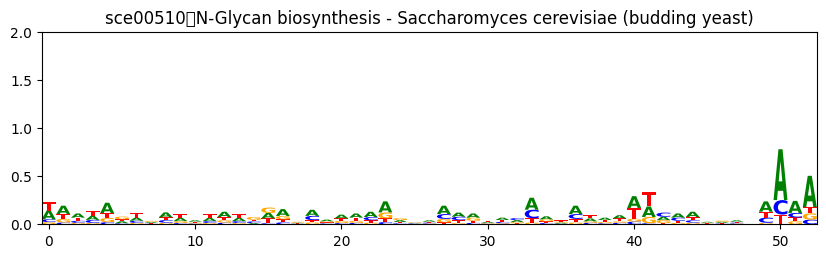

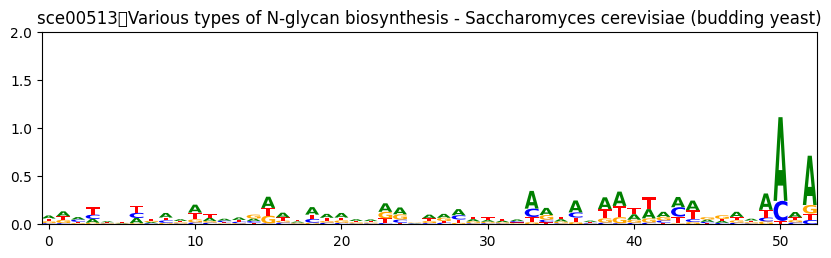

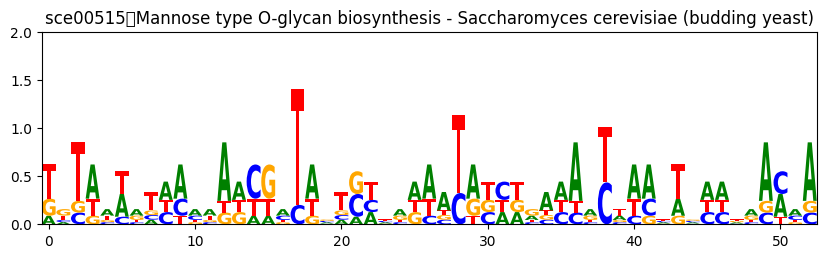

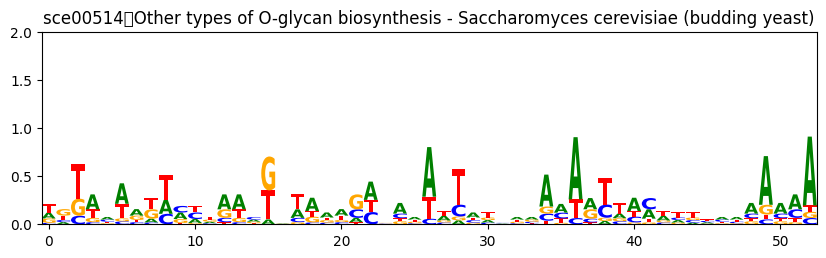

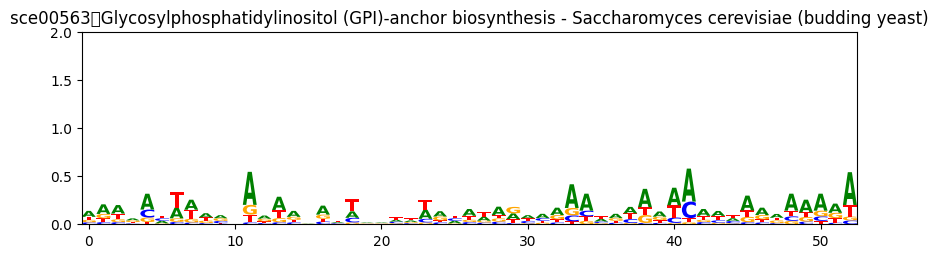

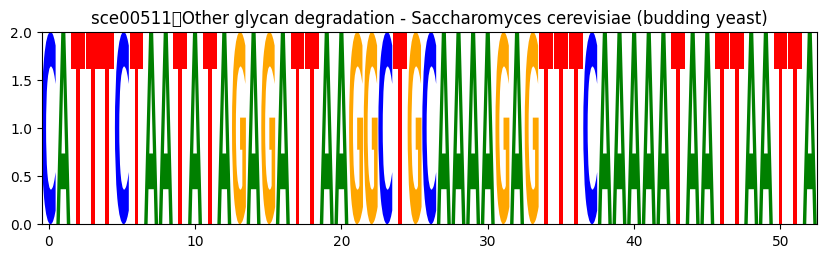

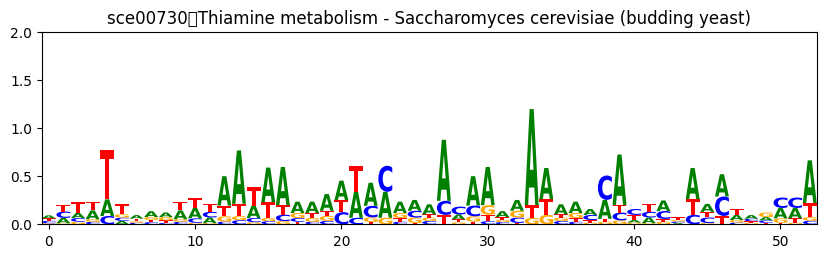

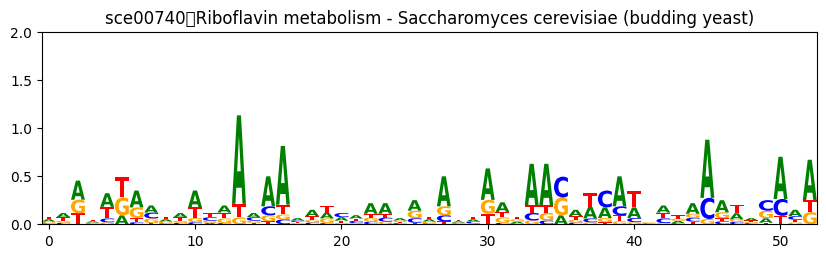

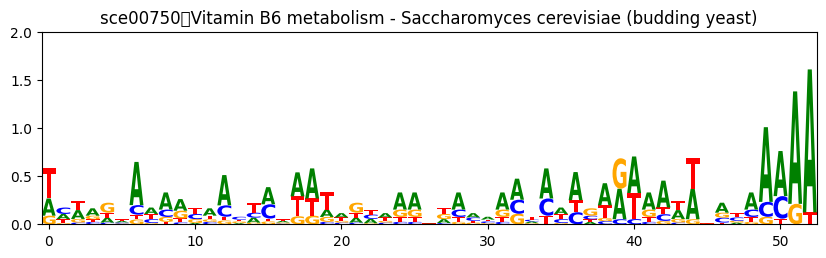

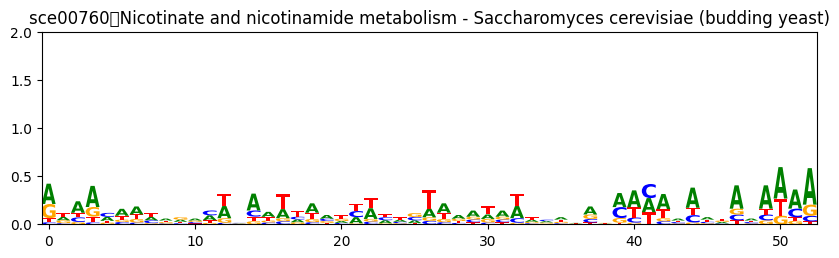

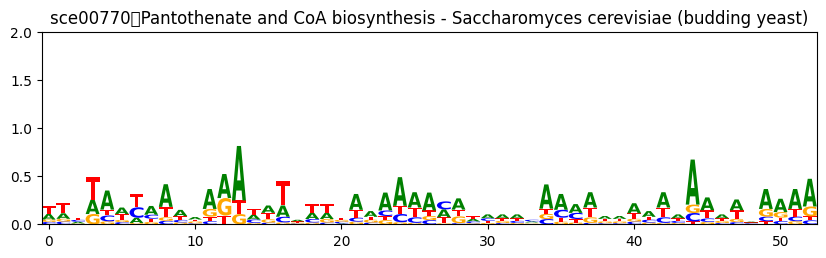

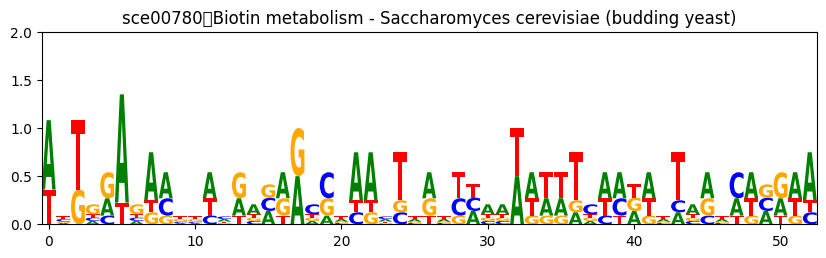

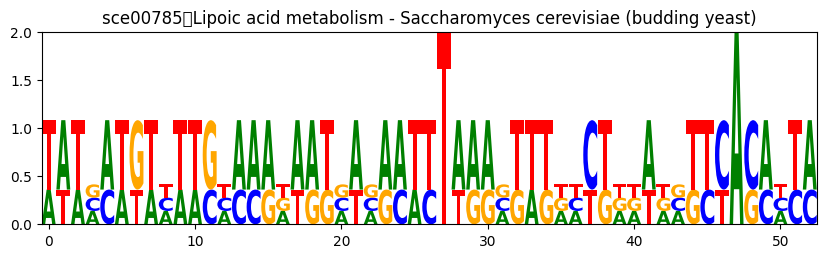

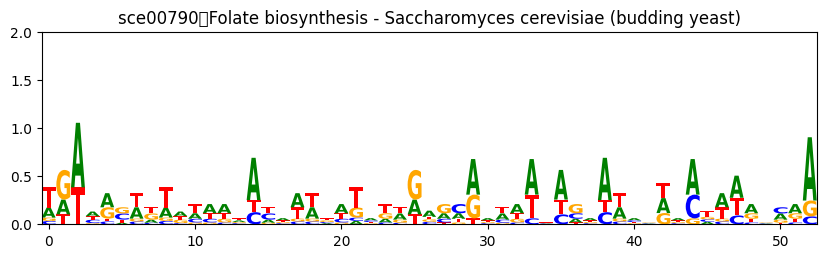

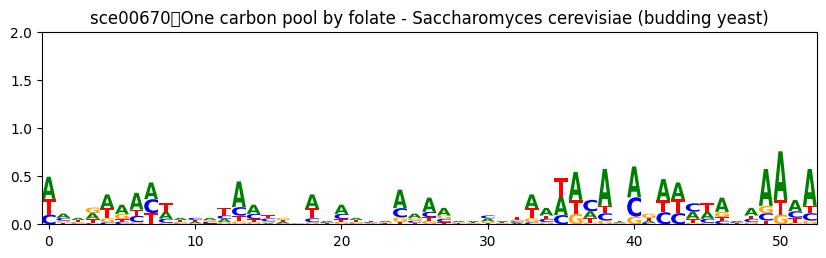

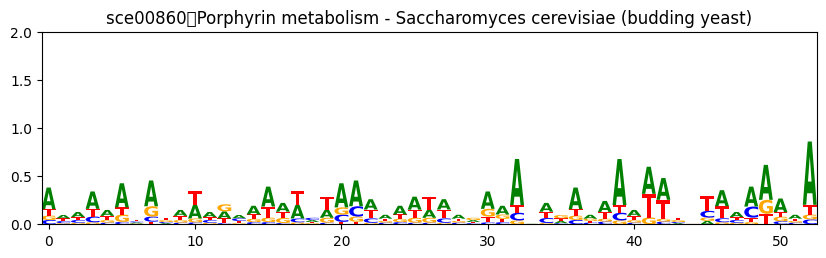

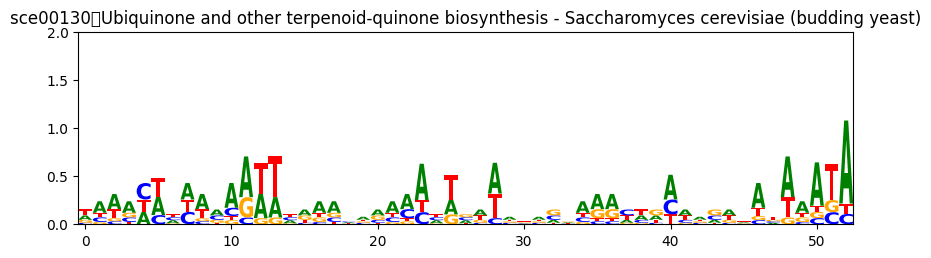

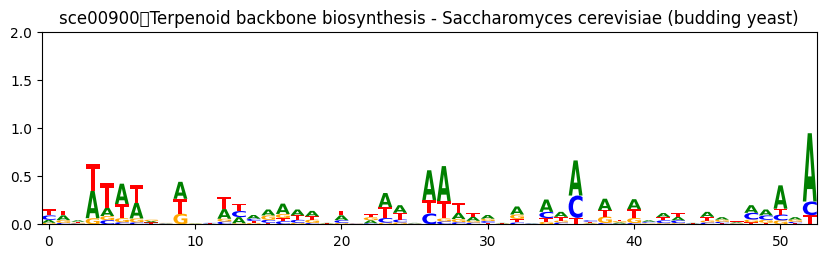

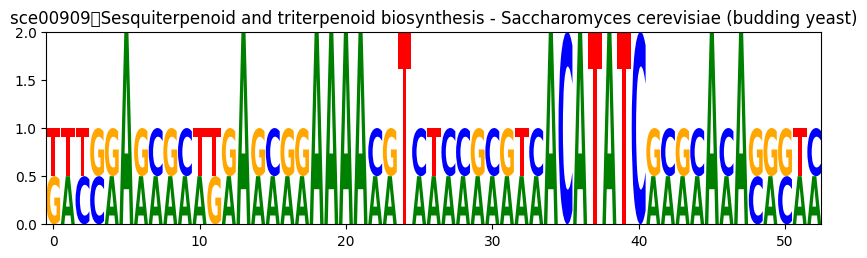

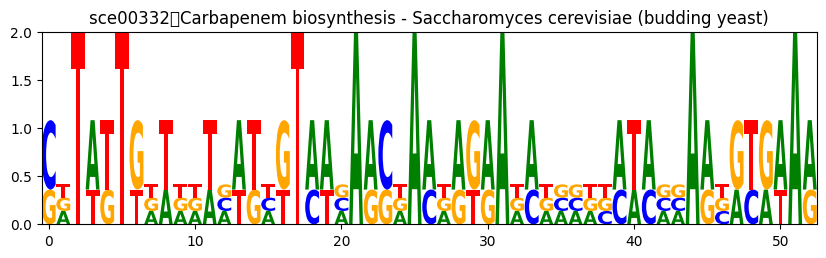

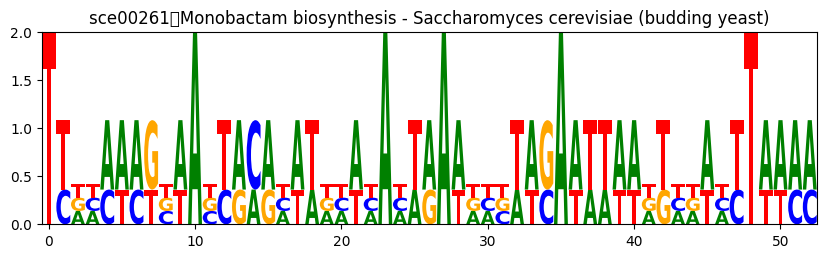

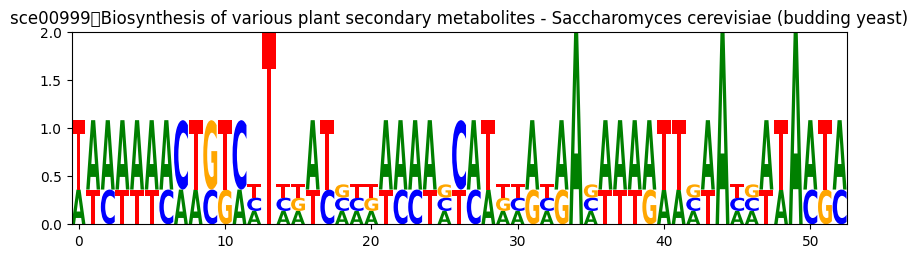

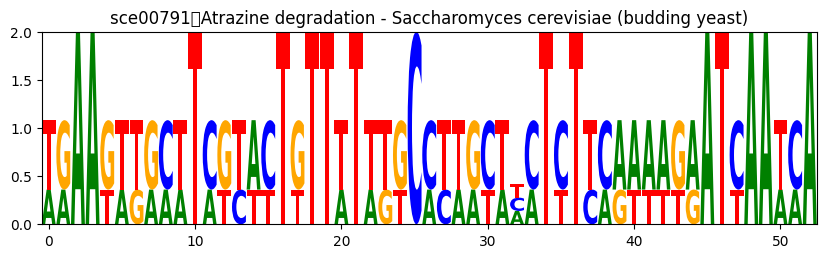

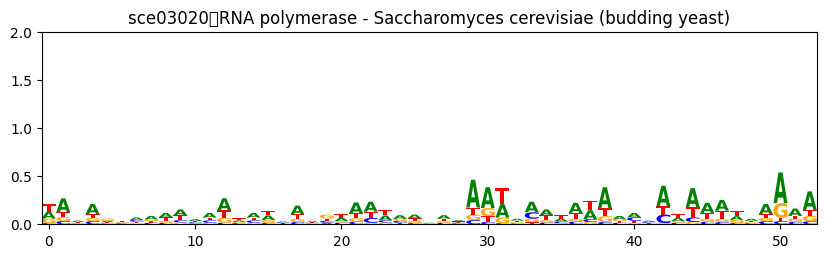

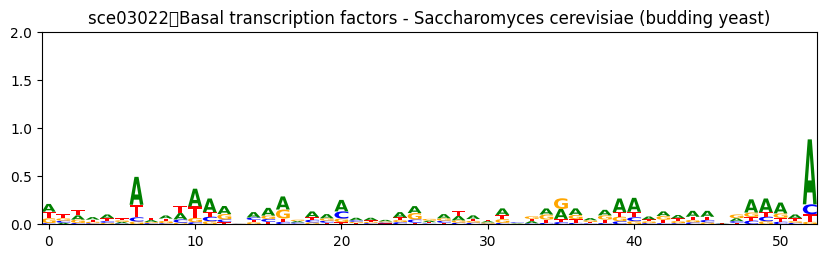

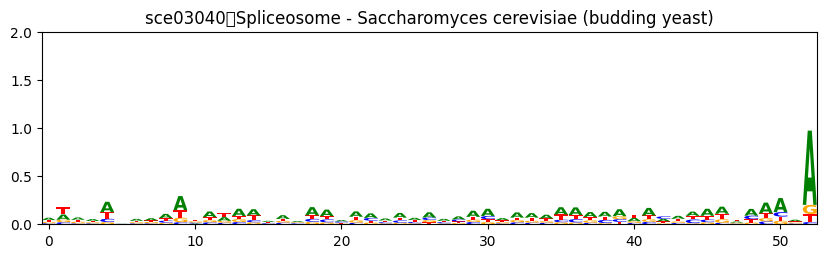

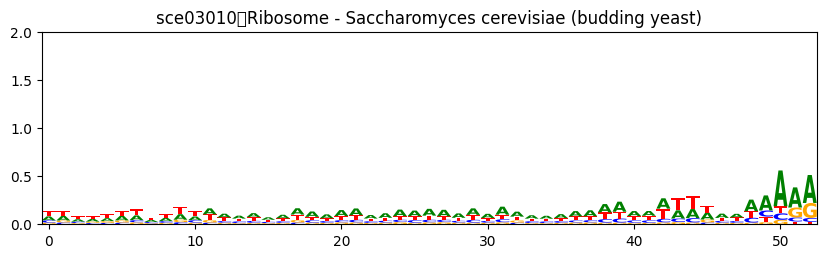

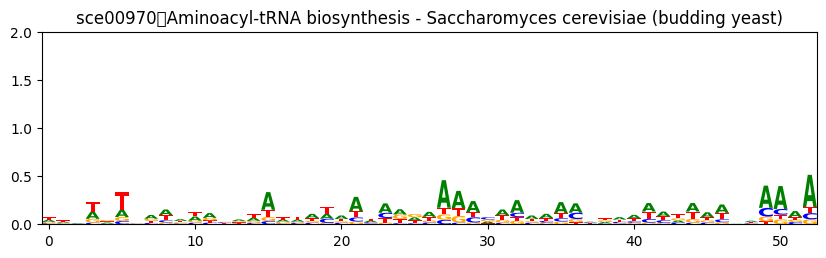

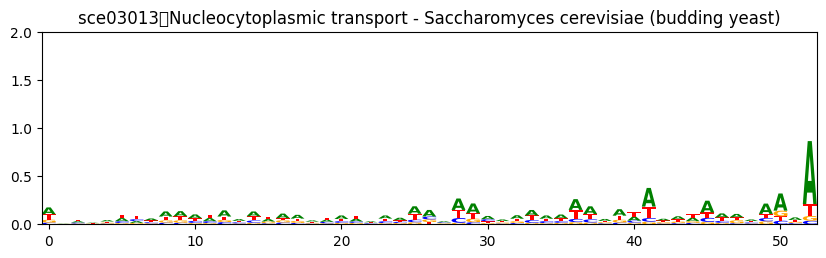

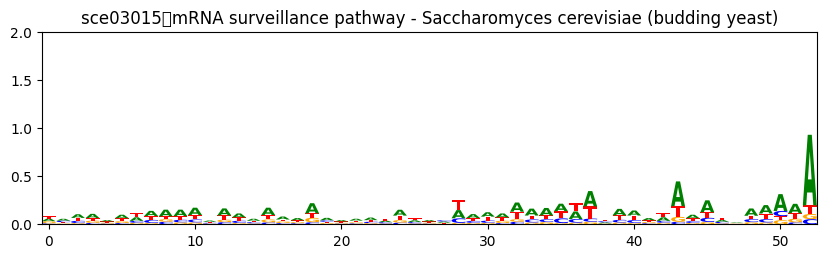

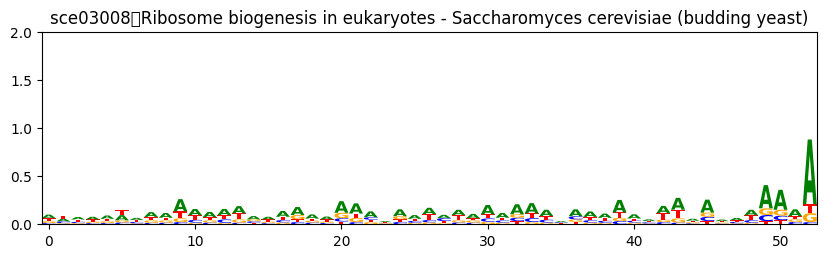

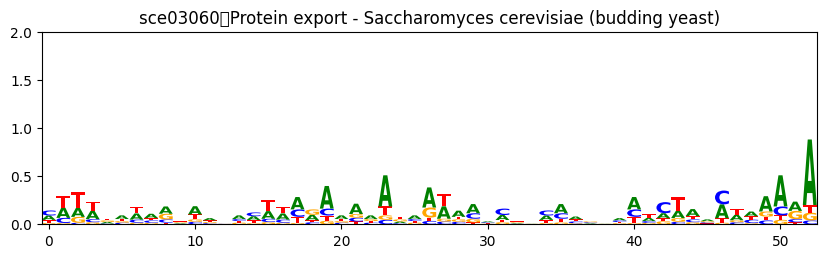

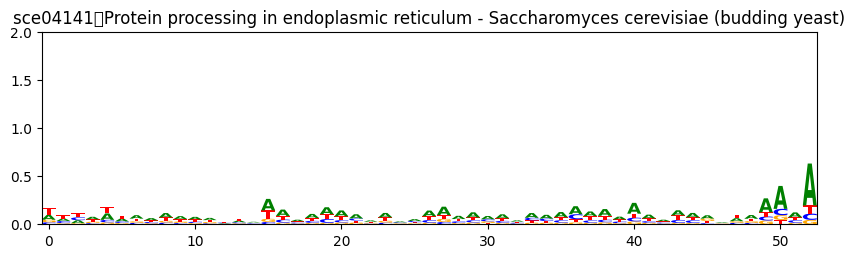

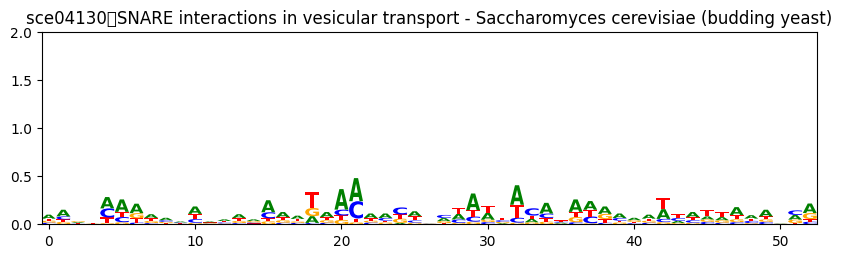

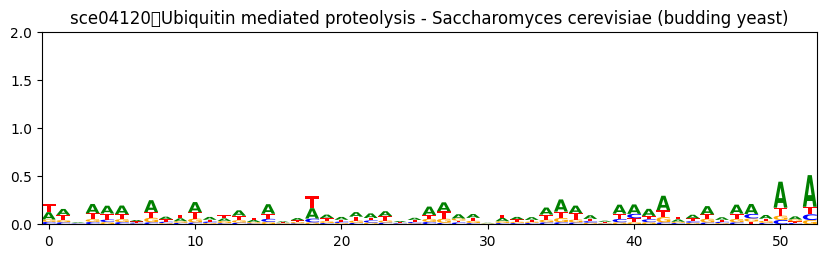

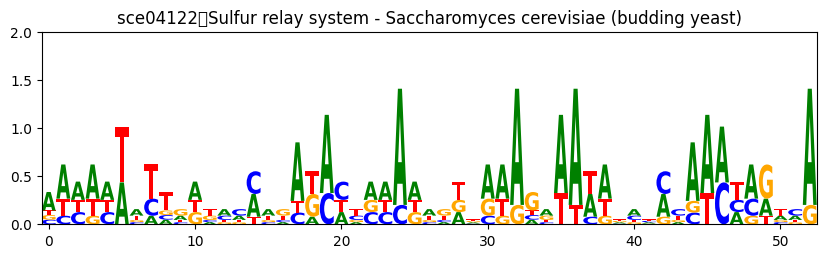

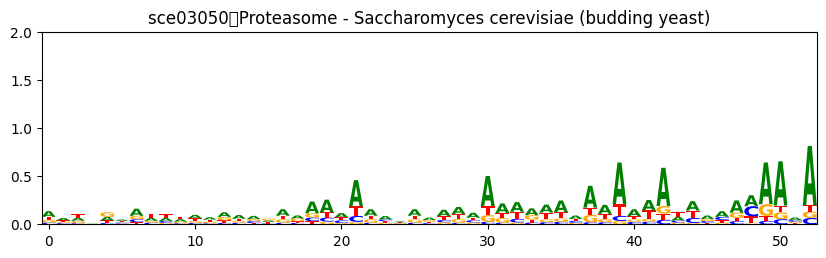

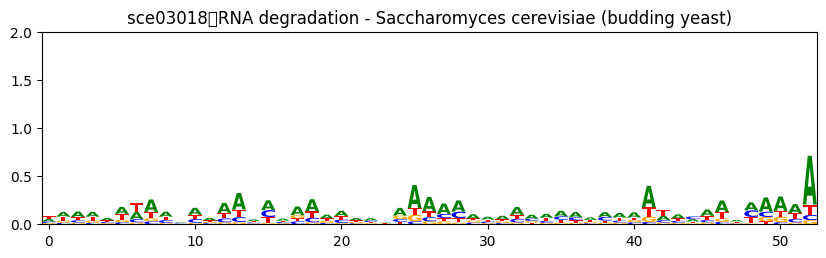

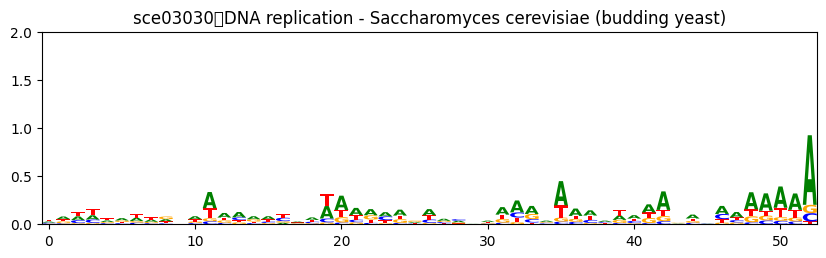

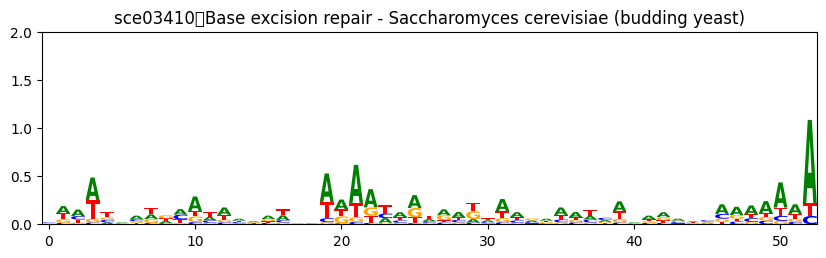

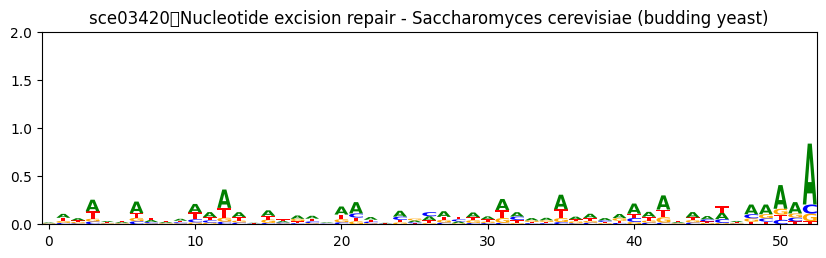

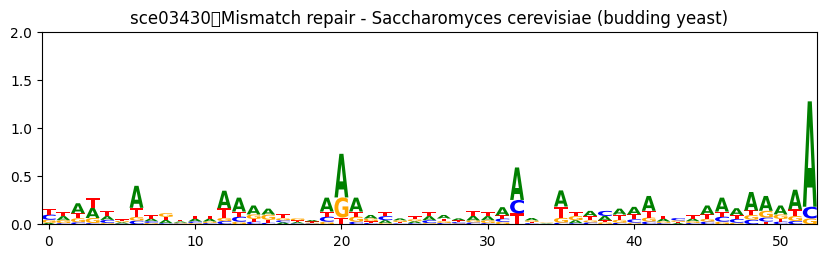

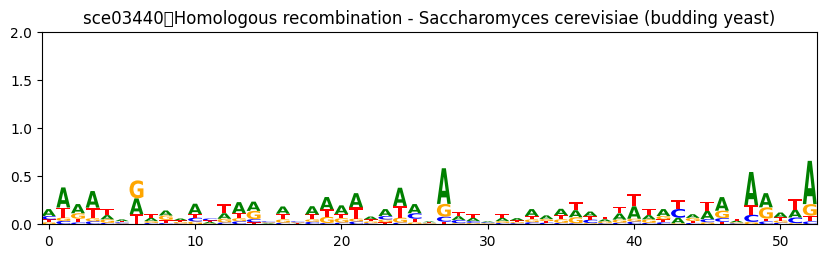

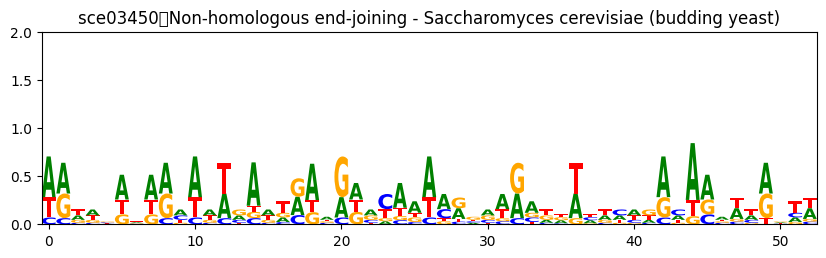

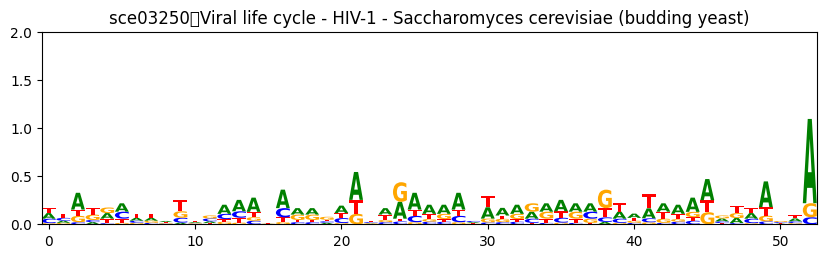

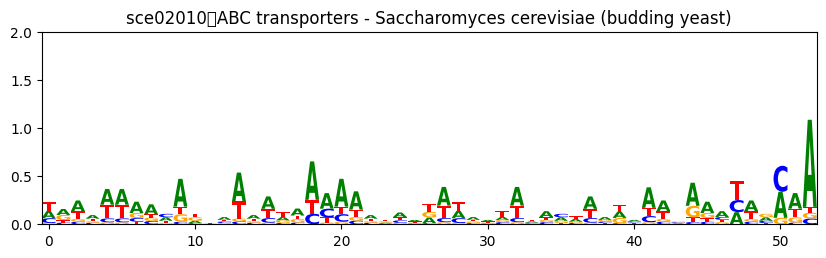

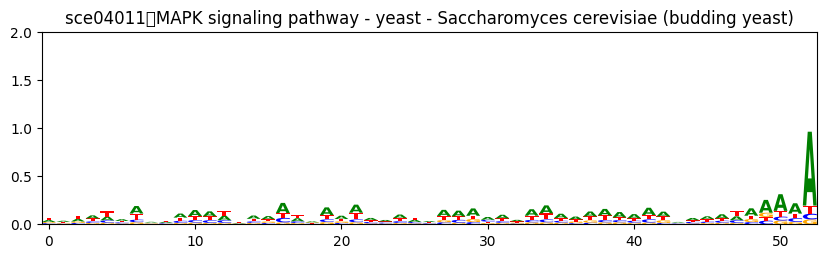

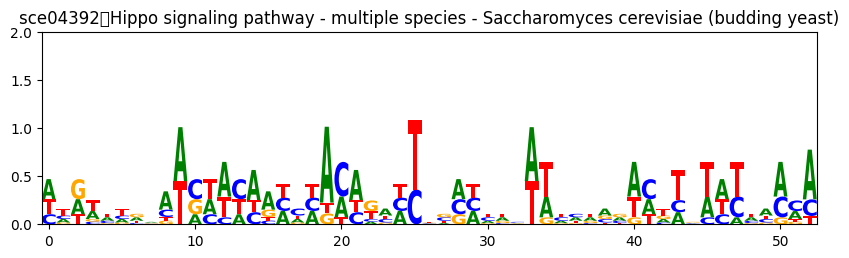

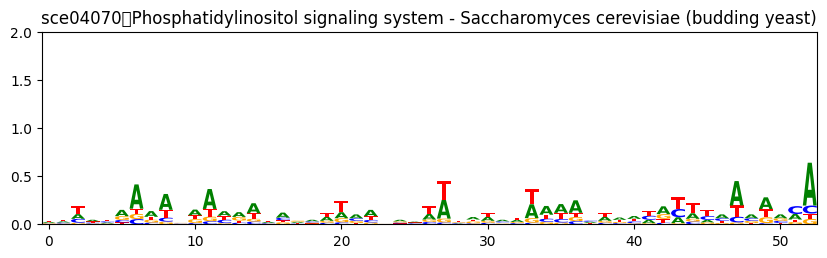

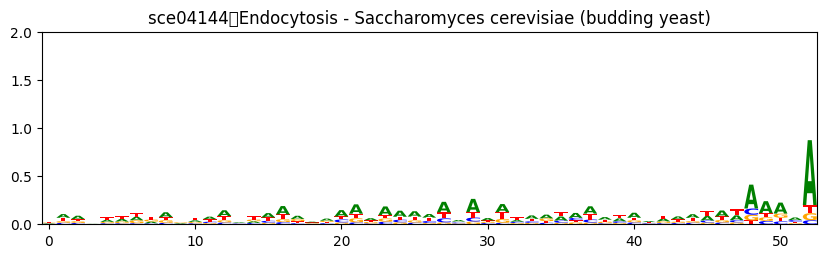

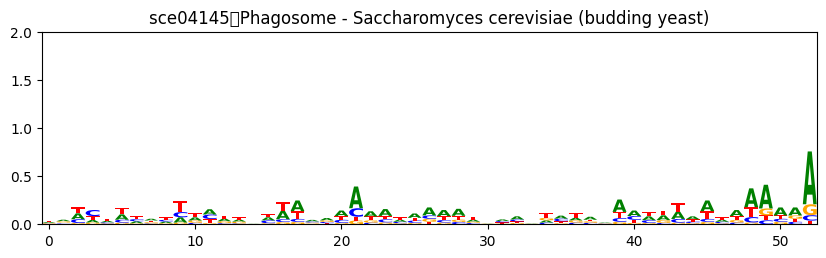

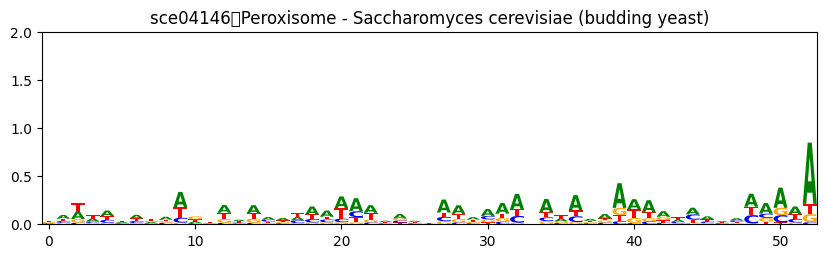

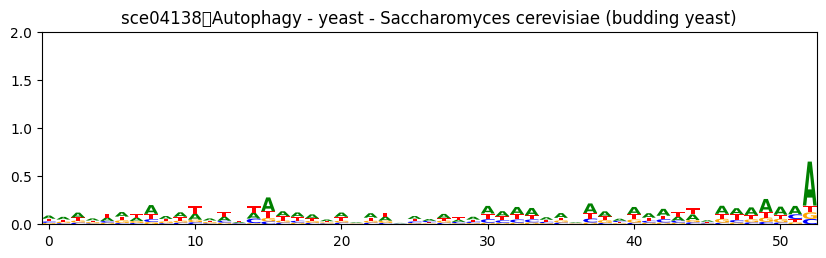

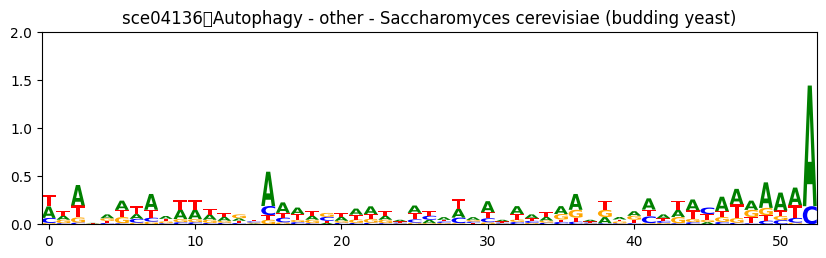

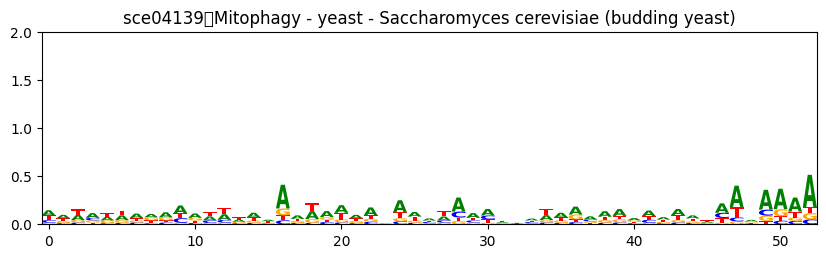

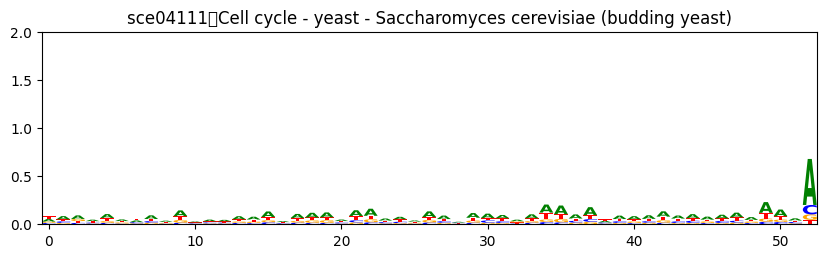

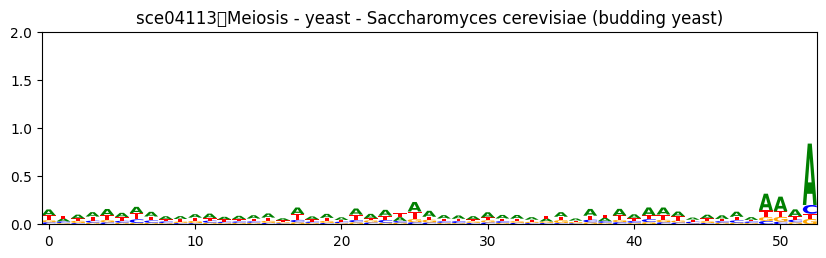

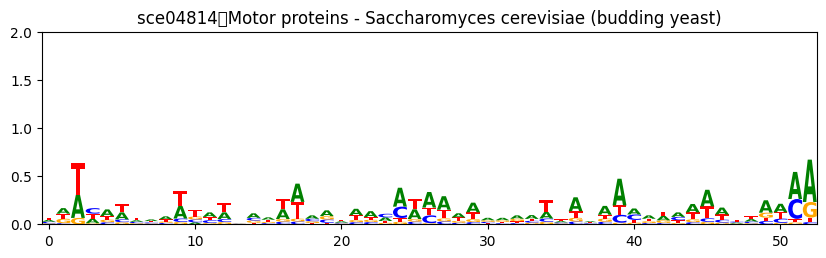

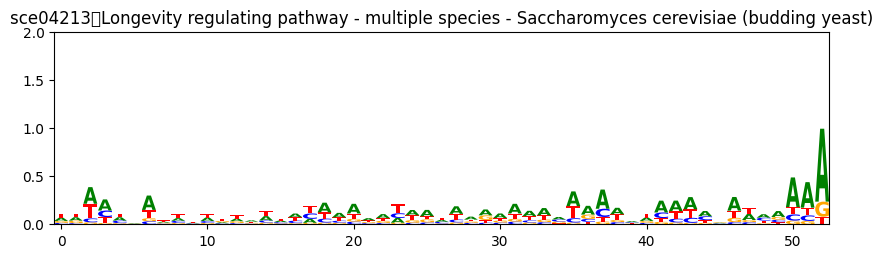

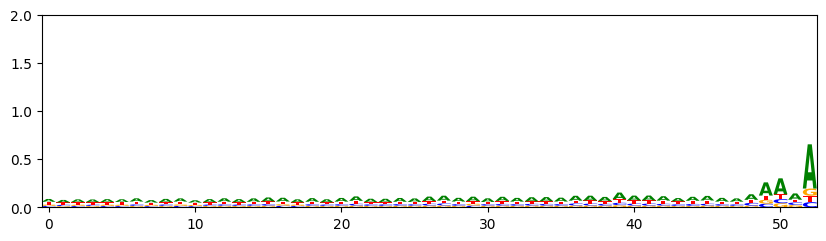

In [ ]:
#partindo do data frame contendo a região 5' UTR, GO, pathways

#conseguindo uma lista contendo todos os pathways de sce
pathways = kegg.list("pathway", "sce")    #listar os pathways de sce e salvar em str
pathways = pathways.split('\n')           #split em \n, pois existe um pathway por linha, logo cria uma lista contendo todos os pathways


for pathway in pathways:
  p = pathway.split('\t')[0]
  df_p = df_cds1[df_cds1['Pathways'].str.contains(p)]
  logo = dna_motif(df_p)
  plt.title(str(pathway))
  plt.ylim(0, 2)
  plt.savefig("/content/motifs/"+p+".png", dpi=300, format="png")




In [ ]:
!zip -r motifs.zip /content/motifs

#Encontrando regiões conservadas em 5'UTR de genes diferencialmente expressos em saccharomyces cerevisiae.

Essa etapa será identificar um estudo de transcriptoma em sce (em determinada condição) e verificar os genes que foram up e down regulated. Com estes genes em mãos, irei agrupalos em seus respectivos metabolismos e/ou GO, e verificarei a existência de regiões concservadas conforme o script acima.

Vou usar a linhagem consumidora de xilose da CELERE-2L (https://www.ncbi.nlm.nih.gov/bioproject/PRJNA667443). Esse estudo diz respeito a utilização da levedura saccharomyces cerevisiae consumindo xilose.

Entrando no SRA Run Selector, vou selecionar apenas 1 linhagem controle (LS) e Industrial (IN) para verificar os genes diferencialmente expressos entre elas.

Esolhi os pontos iniciais (7 horas) para tentar pegar a adaptação da linhagem.



1
SRR12777290
SAMN16366798
197
1.19 G
469.03 Mb
SRX9246897
IN_7h_sample1
PAIRED
Saccharomyces cerevisiae
2020-10-0519:41:00Z
IN_7h_sample1

2
SRR12777311
SAMN16367876
98
511.38 M
248.67 Mb
SRX9246876
LS_6h_sample1
SINGLE
Saccharomyces cerevisiae
2020-10-0519:41:00Z
LS_6h_sample1


##Baixando os dados

In [ ]:
!wget /content/LN_7_sample1.fastq.gz https://trace.ncbi.nlm.nih.gov/Traces/sra-reads-be/fastq?acc=SRR12777290

/content/LN_7_sample1.fastq.gz: Scheme missing.
--2023-05-28 11:39:16--  https://trace.ncbi.nlm.nih.gov/Traces/sra-reads-be/fastq?acc=SRR12777290
Resolving trace.ncbi.nlm.nih.gov (trace.ncbi.nlm.nih.gov)... 130.14.29.113, 2607:f220:41e:4290::113
Connecting to trace.ncbi.nlm.nih.gov (trace.ncbi.nlm.nih.gov)|130.14.29.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘fastq?acc=SRR12777290’

fastq?acc=SRR127772     [<=>                 ] 505.45M  1.08MB/s    in 7m 47s  

2023-05-28 11:47:05 (1.08 MB/s) - ‘fastq?acc=SRR12777290’ saved [530003475]

FINISHED --2023-05-28 11:47:05--
Total wall clock time: 7m 49s
Downloaded: 1 files, 505M in 7m 47s (1.08 MB/s)


In [ ]:
!wget /content/LS_6_sample1.fastq.gz https://trace.ncbi.nlm.nih.gov/Traces/sra-reads-be/fastq?acc=SRR12777311

/content/LS_6_sample1.fastq.gz: Scheme missing.
--2023-05-28 11:47:05--  https://trace.ncbi.nlm.nih.gov/Traces/sra-reads-be/fastq?acc=SRR12777311
Resolving trace.ncbi.nlm.nih.gov (trace.ncbi.nlm.nih.gov)... 130.14.29.113, 2607:f220:41e:4290::113
Connecting to trace.ncbi.nlm.nih.gov (trace.ncbi.nlm.nih.gov)|130.14.29.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘fastq?acc=SRR12777311’

fastq?acc=SRR127773     [               <=>  ] 217.04M  1.04MB/s    in 3m 34s  

2023-05-28 11:50:40 (1.01 MB/s) - ‘fastq?acc=SRR12777311’ saved [227584288]

FINISHED --2023-05-28 11:50:40--
Total wall clock time: 3m 36s
Downloaded: 1 files, 217M in 3m 34s (1.01 MB/s)


In [ ]:
!gzip -d /content/LN_7_sample1.fastq.gz

In [ ]:
!gzip -d /content/LS_6_sample1.fastq.gz

In [ ]:
!less LN_7_sample1.fastq    #verificando os arquivos

@SRR12777290.1.1 1 length=101
ATAATTTCCATCCAAGCTTGGACCAATTCATATTGATCAATTGGGAATTGATCAGTGTCCCAACCATTTTGATAGTCACC TCTGTTAGCATCAATAGAACC
+SRR12777290.1.1 1 length=101
???????????????????????????????????????????????????????????????????????????????? ?????????????????????
@SRR12777290.1.2 1 length=100
GTTAGGTTCTATTGATGCTAACAGAGGTGACTATCAAAATGGTTGGGACACTGATCAATTCCCAATTGATCAATATGAAT TGGTCCAAGCTTGGATGGAA
+SRR12777290.1.2 1 length=100
???????????????????????????????????????????????????????????????????????????????? ????????????????????
@SRR12777290.2.1 2 length=101
GGAATCTTGTAGCACTTTACCCGAGTAGATCAGTTTTATTTGAGATTCTTCACAGGAAATGGATTGAGCAAGCTTGTTCT TGGCCTCTAAATTTGGGTTTG
+SRR12777290.2.1 2 length=101
???????????????????????????????????????????????????????????????????????????????? ?????????????????????
@SRR12777290.2.2 2 length=101
CAAACACAATTTTAGAGACCAAGACCAAGCTTGCTCAATCCATTTCTTGTGAAGATTCTAAAATAAAACTAATCTACTCG GGAAAAGTGCTACAAGATTCC
+SRR12777290.2.2 2 length=101
>8

##Trabalhando com os fastq para análise de transcriptoma



###install packpages

In [ ]:
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.9 MB/s eta 0:00:00


In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:22
🔁 Restarting kernel...


In [ ]:
#!conda install -c bioconda fastqc -y

### Run FastQC to trim your reads

In [ ]:
!fastqc /content/LN_7_sample1.fastq

null
Started analysis of LN_7_sample1.fastq
Approx 5% complete for LN_7_sample1.fastq
Approx 10% complete for LN_7_sample1.fastq
Approx 15% complete for LN_7_sample1.fastq
Approx 20% complete for LN_7_sample1.fastq
Approx 25% complete for LN_7_sample1.fastq
Approx 30% complete for LN_7_sample1.fastq
Approx 35% complete for LN_7_sample1.fastq
Approx 40% complete for LN_7_sample1.fastq
Approx 45% complete for LN_7_sample1.fastq
Approx 50% complete for LN_7_sample1.fastq
Approx 55% complete for LN_7_sample1.fastq
Approx 60% complete for LN_7_sample1.fastq
Approx 65% complete for LN_7_sample1.fastq
Approx 70% complete for LN_7_sample1.fastq
Approx 75% complete for LN_7_sample1.fastq
Approx 80% complete for LN_7_sample1.fastq
Approx 85% complete for LN_7_sample1.fastq
Approx 90% complete for LN_7_sample1.fastq
Approx 95% complete for LN_7_sample1.fastq
Analysis complete for LN_7_sample1.fastq


In [ ]:
!fastqc /content/LS_6_sample1.fastq

null
Started analysis of LS_6_sample1.fastq
Approx 5% complete for LS_6_sample1.fastq
Approx 10% complete for LS_6_sample1.fastq
Approx 15% complete for LS_6_sample1.fastq
Approx 20% complete for LS_6_sample1.fastq
Approx 25% complete for LS_6_sample1.fastq
Approx 30% complete for LS_6_sample1.fastq
Approx 35% complete for LS_6_sample1.fastq
Approx 40% complete for LS_6_sample1.fastq
Approx 45% complete for LS_6_sample1.fastq
Approx 50% complete for LS_6_sample1.fastq
Approx 55% complete for LS_6_sample1.fastq
Approx 60% complete for LS_6_sample1.fastq
Approx 65% complete for LS_6_sample1.fastq
Approx 70% complete for LS_6_sample1.fastq
Approx 75% complete for LS_6_sample1.fastq
Approx 80% complete for LS_6_sample1.fastq
Approx 85% complete for LS_6_sample1.fastq
Approx 90% complete for LS_6_sample1.fastq
Approx 95% complete for LS_6_sample1.fastq
Analysis complete for LS_6_sample1.fastq


In [ ]:
mkdir untrimed-results

In [ ]:
!mv /content/*.html /content/untrimed-results
!mv /content/*.zip /content/untrimed-results

Os reads já estavam trimados, pois o resultado do fastqc não apresentou baixas qualidades.

### Download reference fasta files from ENSEMBL genomes

In [ ]:
#download saccharomyces cerevisae reference cDNA.

!wget https://ftp.ebi.ac.uk/ensemblgenomes/pub/release-56/fungi/fasta/saccharomyces_cerevisiae/cdna/Saccharomyces_cerevisiae.R64-1-1.cdna.all.fa.gz

--2023-05-28 11:59:11--  https://ftp.ebi.ac.uk/ensemblgenomes/pub/release-56/fungi/fasta/saccharomyces_cerevisiae/cdna/Saccharomyces_cerevisiae.R64-1-1.cdna.all.fa.gz
Resolving ftp.ebi.ac.uk (ftp.ebi.ac.uk)... 193.62.193.138
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.193.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3806426 (3.6M) [application/x-gzip]
Saving to: ‘Saccharomyces_cerevisiae.R64-1-1.cdna.all.fa.gz’

Saccharomyces_cerev 100%[===================>]   3.63M   691KB/s    in 5.5s    

2023-05-28 11:59:17 (675 KB/s) - ‘Saccharomyces_cerevisiae.R64-1-1.cdna.all.fa.gz’ saved [3806426/3806426]



In [ ]:
!gzip -d /content/Saccharomyces_cerevisiae.R64-1-1.cdna.all.fa.gz

### Kallisto to RNA-SEQ analysis

Lets use Kallisto to prepare our data to analysis. First we should index our reference genome.

In [ ]:
!conda install -c bioconda kallisto -y

In [ ]:
!kallisto index --index="sce_index" /content/Saccharomyces_cerevisiae.R64-1-1.cdna.all.fa


[build] loading fasta file /content/Saccharomyces_cerevisiae.R64-1-1.cdna.all.fa
[build] k-mer length: 31
[build] counting k-mers ... done.
[build] building target de Bruijn graph ...  done 
[build] creating equivalence classes ...  done
[build] target de Bruijn graph has 11489 contigs and contains 8243691 k-mers 



In [ ]:
#run kallisto for LN_7 paired-end
!kallisto quant -i sce_index -b 100 -o LN_7 /content/LN_7_sample1.fastq /content/LN_7_sample1.fastq


[quant] fragment length distribution will be estimated from the data
[index] k-mer length: 31
[index] number of targets: 6,612
[index] number of k-mers: 8,243,691
[index] number of equivalence classes: 8,064
[quant] running in paired-end mode
[quant] will process pair 1: /content/LN_7_sample1.fastq
                             /content/LN_7_sample1.fastq
[quant] finding pseudoalignments for the reads ... done
[quant] processed 12,045,466 reads, 10,448,735 reads pseudoaligned
[quant] estimated average fragment length: 0
[   em] quantifying the abundances ... done
[   em] the Expectation-Maximization algorithm ran for 495 rounds




In [ ]:
#run kallisto for LN_7 single-end
!kallisto quant -i sce_index -b 100 --single -l 200 -s 20 -o LN_7_single /content/LN_7_sample1.fastq


[quant] fragment length distribution is truncated gaussian with mean = 200, sd = 20
[index] k-mer length: 31
[index] number of targets: 6,612
[index] number of k-mers: 8,243,691
[index] number of equivalence classes: 8,064
[quant] running in single-end mode
[quant] will process file 1: /content/LN_7_sample1.fastq
[quant] finding pseudoalignments for the reads ... done
[quant] processed 12,045,466 reads, 8,933,396 reads pseudoaligned
[   em] quantifying the abundances ... done
[   em] the Expectation-Maximization algorithm ran for 440 rounds




In [ ]:
#run kallisto for LS_6 paired-end
!kallisto quant -i sce_index -b 100 -o LS_6 /content/LS_6_sample1.fastq /content/LS_6_sample1.fastq


[quant] fragment length distribution will be estimated from the data
[index] k-mer length: 31
[index] number of targets: 6,612
[index] number of k-mers: 8,243,691
[index] number of equivalence classes: 8,064
[quant] running in paired-end mode
[quant] will process pair 1: /content/LS_6_sample1.fastq
                             /content/LS_6_sample1.fastq
[quant] finding pseudoalignments for the reads ... done
[quant] processed 5,176,693 reads, 4,141,272 reads pseudoaligned
[quant] estimated average fragment length: 0
[   em] quantifying the abundances ... done
[   em] the Expectation-Maximization algorithm ran for 860 rounds




In [ ]:
#run kallisto for LN_6 single-end
!kallisto quant -i sce_index -b 1 --single -l 200 -s 20 -o LS_6_single /content/LS_6_sample1.fastq


[quant] fragment length distribution is truncated gaussian with mean = 200, sd = 20
[index] k-mer length: 31
[index] number of targets: 6,612
[index] number of k-mers: 8,243,691
[index] number of equivalence classes: 8,064
[quant] running in single-end mode
[quant] will process file 1: /content/LS_6_sample1.fastq
[quant] finding pseudoalignments for the reads ... done
[quant] processed 5,176,693 reads, 3,223,603 reads pseudoaligned
[   em] quantifying the abundances ... done
[   em] the Expectation-Maximization algorithm ran for 876 rounds




zip the output from kallisto to download and use in sleuth ~Rstudio.

In [ ]:
%%bash

zip -r LN_7.zip /content/LN_7
zip -r LN_7_single.zip /content/LN_7_single
zip -r LS_6.zip /content/LS_6
zip -r LS_6_single.zip /content/LS_6_single


updating: content/LN_7/ (stored 0%)
updating: content/LN_7/abundance.tsv (deflated 60%)
updating: content/LN_7/abundance.h5 (deflated 11%)
updating: content/LN_7/run_info.json (deflated 39%)
updating: content/LN_7_single/ (stored 0%)
updating: content/LN_7_single/abundance.tsv (deflated 60%)
updating: content/LN_7_single/abundance.h5 (deflated 11%)
updating: content/LN_7_single/run_info.json (deflated 37%)
updating: content/LS_6/ (stored 0%)
updating: content/LS_6/abundance.tsv (deflated 61%)
updating: content/LS_6/abundance.h5 (deflated 11%)
updating: content/LS_6/run_info.json (deflated 39%)
updating: content/LS_6_single/ (stored 0%)
updating: content/LS_6_single/abundance.tsv (deflated 61%)
updating: content/LS_6_single/abundance.h5 (deflated 29%)
updating: content/LS_6_single/run_info.json (deflated 37%)


Analisar os diferentes abundance.tsv files gerados em cada um dos métodos e compara-los entre si

In [ ]:
import pandas as pd

ls6_pe = pd.read_csv("/content/LS_6/abundance.tsv", sep = '\t')
ln7_pe = pd.read_csv("/content/LN_7/abundance.tsv", sep = '\t')
ls6_se = pd.read_csv("/content/LS_6_single/abundance.tsv", sep = '\t')
ln7_se = pd.read_csv("/content/LN_7_single/abundance.tsv", sep = '\t')

In [ ]:
ln7_se.head(3)

target_id  length  eff_length  est_counts        tpm
0  YPL071C_mRNA     471       272.0     103.000   23.18910
1  YLL050C_mRNA     432       233.0    2685.000  705.67400
2  YMR172W_mRNA    2160      1961.0     236.801    7.39473

target_id: Identificador do transcrito. Geralmente corresponde ao identificador do gene ou do transcrito no transcriptoma de referência.


length: Comprimento do transcrito em nucleotídeos. É a medida do tamanho do transcrito.


eff_length: Comprimento efetivo do transcrito. É uma medida ajustada do comprimento do transcrito que leva em consideração a probabilidade de alinhamento dos reads.


est_counts: Contagem estimada de leituras alinhadas ao transcrito. Essa é uma estimativa do número de leituras (reads) originadas do transcrito específico.


tpm (transcripts per million): Expressão gênica normalizada em TPM. É uma medida de abundância relativa que leva em consideração o comprimento efetivo do transcrito e a contagem estimada de leituras.

O est_counts e o tpm são particularmente importantes para comparar a expressão gênica entre diferentes amostras ou condições experimentais.


Text(0, 0.5, 'TPM')

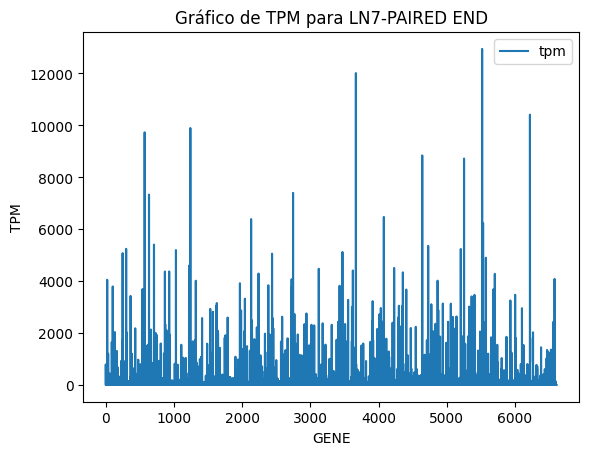

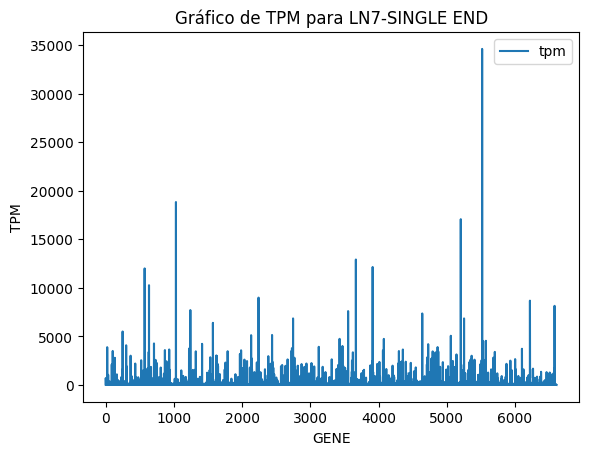

In [ ]:
import matplotlib.pyplot as plt

ln7_pe.plot(y = 'tpm')
plt.title('Gráfico de TPM para LN7-PAIRED END')
plt.xlabel('GENE')
plt.ylabel('TPM')


ln7_se.plot(y = 'tpm')
plt.title('Gráfico de TPM para LN7-SINGLE END')
plt.xlabel('GENE')
plt.ylabel('TPM')

Text(0, 0.5, 'est_counts')

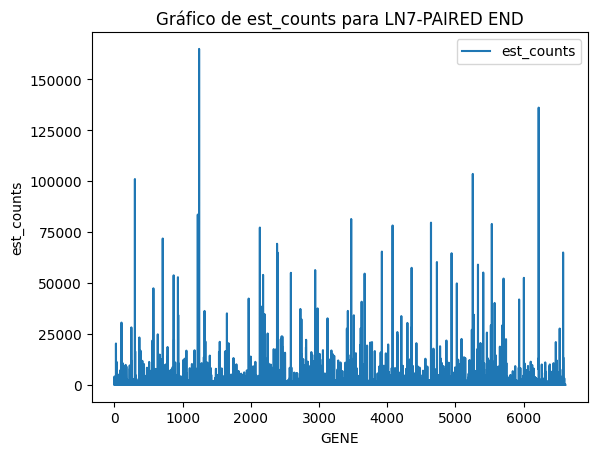

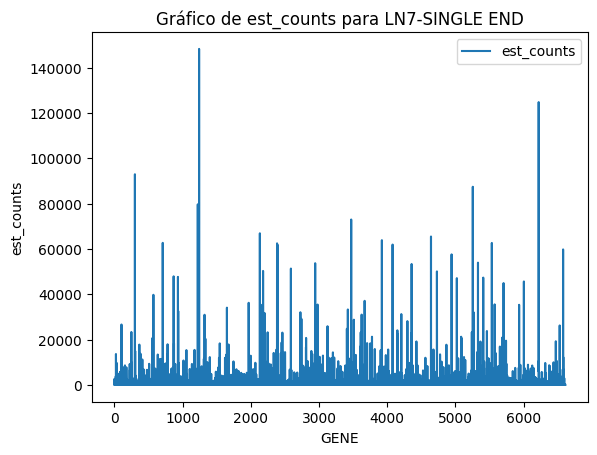

In [ ]:
ln7_pe.plot(y = 'est_counts')
plt.title('Gráfico de est_counts para LN7-PAIRED END')
plt.xlabel('GENE')
plt.ylabel('est_counts')


ln7_se.plot(y = 'est_counts')
plt.title('Gráfico de est_counts para LN7-SINGLE END')
plt.xlabel('GENE')
plt.ylabel('est_counts')

Text(0, 0.5, 'TPM')

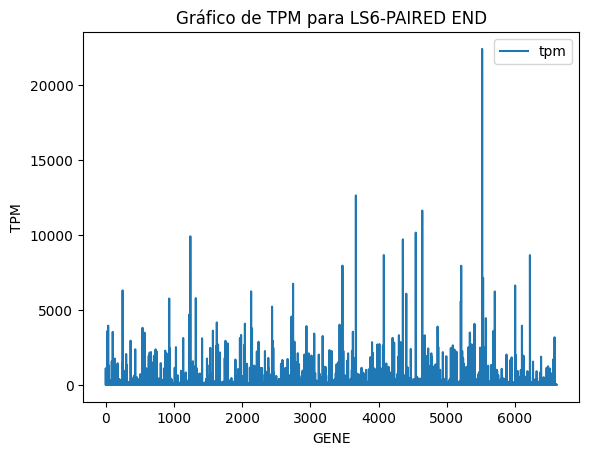

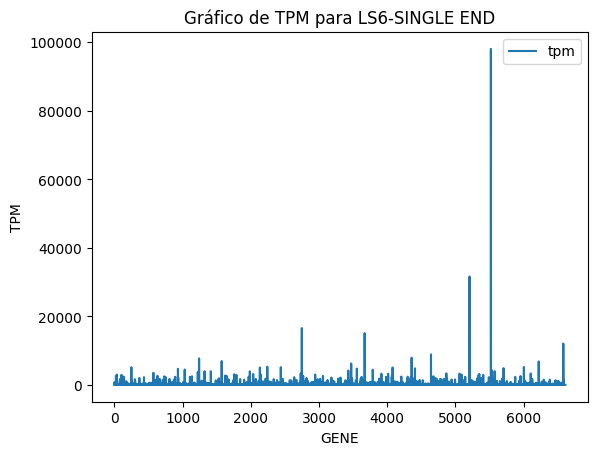

In [ ]:
ls6_pe.plot(y = 'tpm')
plt.title('Gráfico de TPM para LS6-PAIRED END')
plt.xlabel('GENE')
plt.ylabel('TPM')


ls6_se.plot(y = 'tpm')
plt.title('Gráfico de TPM para LS6-SINGLE END')
plt.xlabel('GENE')
plt.ylabel('TPM')

Text(0, 0.5, 'est_counts')

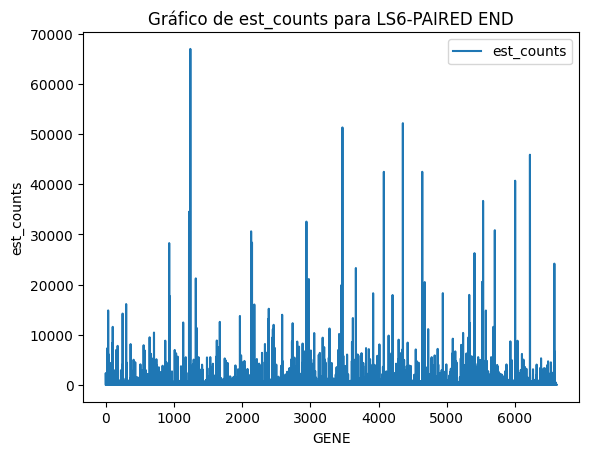

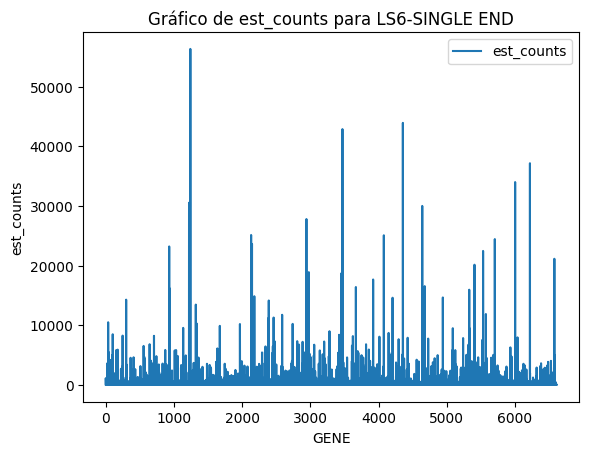

In [ ]:
ls6_pe.plot(y = 'est_counts')
plt.title('Gráfico de est_counts para LS6-PAIRED END')
plt.xlabel('GENE')
plt.ylabel('est_counts')


ls6_se.plot(y = 'est_counts')
plt.title('Gráfico de est_counts para LS6-SINGLE END')
plt.xlabel('GENE')
plt.ylabel('est_counts')

**COMPARAÇÃO PAIRED-END vs SINGLE-END**

*   Length: se mantem nos dois métodos
*   eff_length: Aparece maior em alguns casos do paired_end
*   est_counts: Aparece um pouco maior em paired end
*   tpm: Muito maior em single end




## Análise da expressão diferencial de genes.


Vou tentar usar o pydeseq2 para analisar a expressão diferencial dos genes.
https://pydeseq2.readthedocs.io/en/latest/auto_examples/plot_minimal_pydeseq2_pipeline.html

In [ ]:
!conda update -n base conda

In [ ]:
!conda install -c bioconda pydeseq2 -y

In [ ]:
import os
import pickle as pkl

from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
from pydeseq2.utils import load_example_data

SAVE = False  # whether to save the outputs of this notebook

if SAVE:
    # Replace this with the path to directory where you would like results to be saved
    OUTPUT_PATH = "/content/outputdeseq2"
    os.makedirs(OUTPUT_PATH, exist_ok=True)  # Create path if it doesn't exist

A count matrix of shape ‘number of samples’ x ‘number of genes’, containing read counts (non-negative integers). Vou usar o TPM para isso.

In [ ]:
data = ls6_pe[['target_id','tpm', ]]
data = pd.DataFrame(data)
data_ls6_pe = data.pivot_table(index = None, columns = 'target_id', values = 'tpm')
data_ls6_pe

target_id  Q0010_mRNA  Q0017_mRNA  Q0032_mRNA  Q0045_mRNA  Q0050_mRNA  \
tpm               0.0         0.0         0.0     1.14255    0.162716   

target_id  Q0055_mRNA  Q0060_mRNA  Q0065_mRNA  Q0070_mRNA  Q0075_mRNA  ...  \
tpm           1.03292    0.163237         0.0         0.0         0.0  ...   

target_id  YPR196W_mRNA  YPR197C_mRNA  YPR198W_mRNA  YPR199C_mRNA  \
tpm               25.58       10.5994       19.0557        41.651   

target_id  YPR200C_mRNA  YPR201W_mRNA  YPR202W_mRNA  YPR203W_mRNA  \
tpm             4.65722         4.527        8.7308       6.92859   

target_id  YPR204C-A_mRNA  YPR204W_mRNA  
tpm                   0.0       9.89754  

[1 rows x 6612 columns]

In [ ]:
data = ln7_pe[['target_id','tpm', ]]
data = pd.DataFrame(data)
data_ln7_pe = data.pivot_table(index = None, columns = 'target_id', values = 'tpm')
data_ln7_pe

target_id  Q0010_mRNA  Q0017_mRNA  Q0032_mRNA  Q0045_mRNA  Q0050_mRNA  \
tpm               0.0         0.0         0.0     2.52969    0.687975   

target_id  Q0055_mRNA  Q0060_mRNA  Q0065_mRNA  Q0070_mRNA  Q0075_mRNA  ...  \
tpm          0.805461         0.0         0.0         0.0    0.155101  ...   

target_id  YPR196W_mRNA  YPR197C_mRNA  YPR198W_mRNA  YPR199C_mRNA  \
tpm             35.5451       2.54395       12.9908       33.6835   

target_id  YPR200C_mRNA  YPR201W_mRNA  YPR202W_mRNA  YPR203W_mRNA  \
tpm             13.8481       6.05062       2.94487       3.23846   

target_id  YPR204C-A_mRNA  YPR204W_mRNA  
tpm                   0.0       11.7174  

[1 rows x 6612 columns]

In [ ]:
data = data_ls6_pe.append(data_ln7_pe, ignore_index=True)
counts_data = data.rename(index={0:'LS_6_PE', 1:'LN_7_PE'})
counts_data

target_id  Q0010_mRNA  Q0017_mRNA  Q0032_mRNA  Q0045_mRNA  Q0050_mRNA  \
LS_6_PE           0.0         0.0         0.0     1.14255    0.162716   
LN_7_PE           0.0         0.0         0.0     2.52969    0.687975   

target_id  Q0055_mRNA  Q0060_mRNA  Q0065_mRNA  Q0070_mRNA  Q0075_mRNA  ...  \
LS_6_PE      1.032920    0.163237         0.0         0.0    0.000000  ...   
LN_7_PE      0.805461    0.000000         0.0         0.0    0.155101  ...   

target_id  YPR196W_mRNA  YPR197C_mRNA  YPR198W_mRNA  YPR199C_mRNA  \
LS_6_PE         25.5800      10.59940       19.0557       41.6510   
LN_7_PE         35.5451       2.54395       12.9908       33.6835   

target_id  YPR200C_mRNA  YPR201W_mRNA  YPR202W_mRNA  YPR203W_mRNA  \
LS_6_PE         4.65722       4.52700       8.73080       6.92859   
LN_7_PE        13.84810       6.05062       2.94487       3.23846   

target_id  YPR204C-A_mRNA  YPR204W_mRNA  
LS_6_PE               0.0       9.89754  
LN_7_PE               0.0      11.71740  

[2 rows x 6612 columns]

In [ ]:
clinical_data = pd.DataFrame({'Condition': ['LS6_PE', 'LN7_PE']})
clinical_data = clinical_data.rename(index={0:'LS_6_PE', 1:'LN_7_PE'})
clinical_data

Condition
LS_6_PE    LS6_PE
LN_7_PE    LN7_PE

Before proceeding with DEA, it is good practice to preprocess your data, e.g. to remove samples for which annotations are missing and exclude genes with very low levels of expression. This is not necessary in the case of our synthetic data, but don’t forget this step if you are using real data. To this end you can use the code below.

In [ ]:
samples_to_keep = ~clinical_data.Condition.isna()
counts_df = counts_data.loc[samples_to_keep]
clinical_df = clinical_data.loc[samples_to_keep]

In [ ]:
#Next, we filter out genes that have less than 10 read counts in total. Note again that there are no such genes in this synthetic dataset.

genes_to_keep = counts_df.columns[counts_df.sum(axis=0) >= 10]
counts_df = counts_df[genes_to_keep]

Read counts modeling with the DeseqDataSet class
We start by creating a DeseqDataSet object from the count and clinical data. A DeseqDataSet fits dispersion and log-fold change (LFC) parameters from the data, and stores them.

In [ ]:
counts_df = counts_df.astype(int)

dds = DeseqDataSet(
    counts=counts_df,
    clinical=clinical_df,
    design_factors="Condition",
    refit_cooks=True,
    n_cpus=8,
)

In [ ]:
dds

AnnData object with n_obs × n_vars = 2 × 5563
    obs: 'Condition'
    obsm: 'design_matrix'

In [ ]:
dds.deseq2()

Não consegui usar o deseq2 em python, então irei aprender usar em R e depois aprendo a usar em python

## Análise usando DEseq2 in Rstudio


Irei formatar os dados conforme o vídeo abaixo e utilizar o output para quantificar os genes diferencialmente expressos no dataset LN7 e LS6.

https://www.youtube.com/watch?v=OzNzO8qwwp0

1) Criar as coluna counts contendo cada linha um gene e cada coluna a quantidade de transcritos. Irei utilizar o output do kallisto (TPM - transcritos por milhão) na análise

2) Criar um csv contendo as linhagens nas linhas ( mesmo nome das colunas do df anterior). E as especificações nas outras colunas exemplo: linhagem, cultivo, etc.

ps: cuidado com a quantidade de linhas vazias nos dataframes

In [ ]:
'''TOP GENES UP REGULATED

log2 fold change (MLE): fermentation Industrial vs Laboratory
Wald test p-value: fermentation Industrial vs Laboratory
DataFrame with 10 rows and 6 columns
                baseMean log2FoldChange     lfcSE      stat      pvalue
               <numeric>      <numeric> <numeric> <numeric>   <numeric>
YBR032W_mRNA     387.101        12.0641   1.17834  10.23819 1.33717e-24
YHR140W_mRNA     349.460        11.9165   1.17838  10.11258 4.85871e-24
YOR032W-A_mRNA   332.673        11.8455   1.17840  10.05213 8.99047e-24
YGR122C-A_mRNA   327.078        11.8210   1.17841  10.03130 1.11050e-23
YBL083C_mRNA     326.061        11.8165   1.17841  10.02747 1.15437e-23
YBR200W-A_mRNA   303.679        11.7139   1.17845   9.94012 2.78483e-23
YMR316C-B_mRNA   298.592        11.6895   1.17845   9.91937 3.42906e-23
YGR109C_mRNA     297.575        11.6846   1.17846   9.91518 3.57612e-23
YGL177W_mRNA     265.020        11.5174   1.17852   9.77283 1.47285e-22
YDR403W_mRNA     255.355        11.4639   1.17854   9.72717 2.30923e-22


In [ ]:
'''TOP GENES DOWN REGULATED


log2 fold change (MLE): fermentation Industrial vs Laboratory
Wald test p-value: fermentation Industrial vs Laboratory
DataFrame with 10 rows and 6 columns
                baseMean log2FoldChange     lfcSE      stat      pvalue
               <numeric>      <numeric> <numeric> <numeric>   <numeric>
YIL060W_mRNA     323.389       -11.7550   1.17840  -9.97537 1.95369e-23
YOR053W_mRNA     305.696       -11.6738   1.17843  -9.90627 3.90971e-23
YJR036C_mRNA     303.239       -11.6622   1.17843  -9.89636 4.31717e-23
YKL188C_mRNA     292.918       -11.6122   1.17845  -9.85382 6.59857e-23
YHR028W-A_mRNA   248.685       -11.3760   1.17854  -9.65269 4.78823e-22
YML101C-A_mRNA   240.330       -11.3267   1.17856  -9.61069 7.20628e-22
YNL105W_mRNA     236.890       -11.3059   1.17856  -9.59297 8.55841e-22
YIL029C_mRNA     232.958       -11.2818   1.17858  -9.57240 1.04452e-21
YER179W_mRNA     229.027       -11.2572   1.17859  -9.55148 1.27860e-21
YMR040W_mRNA     227.552       -11.2479   1.17859  -9.54354 1.38040e-21


Os dados apresentados são os resultados de uma análise de expressão gênica comparando a fermentação industrial versus laboratorial. A tabela possui 10 linhas (representando 10 genes) e 6 colunas com os seguintes dados:

- baseMean: Média da contagem de expressão gênica para cada gene, calculada em todas as amostras.

- log2FoldChange: A alteração na expressão gênica, expressa em escala logarítmica (base 2), entre a fermentação industrial e laboratorial. Valores negativos indicam uma diminuição na expressão e valores positivos indicam um aumento.

- lfcSE: O erro padrão estimado para o log2FoldChange.

- stat: O valor estatístico calculado para testar a significância da diferença na expressão gênica entre os dois grupos. Esse valor é obtido utilizando um teste estatístico específico, como o teste Wald.

- pvalue: O valor p associado ao teste estatístico, que indica a probabilidade de observar a diferença na expressão gênica entre os grupos por acaso. Valores baixos de p-value indicam uma diferença estatisticamente significativa.

Observando os dados, podemos notar que todos os genes apresentam p-value igual a 0, indicando que a diferença na expressão gênica entre a fermentação industrial e laboratorial é estatisticamente significativa para todos os genes analisados. Além disso, a coluna log2FoldChange indica o sentido e a magnitude da alteração na expressão gênica. Por exemplo, para o gene YER011W_mRNA, a expressão é reduzida (-1.66402), enquanto para o gene YML055W_mRNA, a expressão é aumentada (3.19773).

Esses dados são úteis para identificar genes que são diferencialmente expressos entre os dois grupos e podem fornecer insights sobre os processos biológicos subjacentes à fermentação industrial em comparação com a fermentação laboratorial.

Usando esses dados eu consigo encontrar quais genes foram mais e menos expressos.

##Encontrando os MOTIF dos 10 genes mais e menos expressos.

In [ ]:
#genes retirados da análise em DESeq2 e editados com chatGPT

up_regulated = ['YBR032W_mRNA', 'YHR140W_mRNA', 'YOR032W-A_mRNA', 'YGR122C-A_mRNA',
         'YBL083C_mRNA', 'YBR200W-A_mRNA', 'YMR316C-B_mRNA', 'YGR109C_mRNA',
         'YGL177W_mRNA', 'YDR403W_mRNA', 'YJL170C_mRNA', 'YLR458W_mRNA',
         'YNL332W_mRNA', 'YKL096C-B_mRNA', 'YLR041W_mRNA', 'YER088W-B_mRNA',
         'YHR095W_mRNA', 'YNL203C_mRNA', 'YMR272W-B_mRNA', 'YDR508C_mRNA',
         'YFR012W-A_mRNA', 'YLR040C_mRNA', 'YDL244W_mRNA', 'YPL152W-A_mRNA',
         'YCL022C_mRNA', 'YKL183C-A_mRNA', 'YDR461W_mRNA', 'YLR445W_mRNA',
         'YBR186W_mRNA', 'YOR161C-C_mRNA', 'YER006C-A_mRNA', 'YPR170W-A_mRNA',
         'YCR001W_mRNA', 'YFR034W-A_mRNA', 'YBR182C-A_mRNA', 'YPL280W_mRNA',
         'YAL019W-A_mRNA', 'YGL258W-A_mRNA', 'YDR218C_mRNA', 'YOL155W-A_mRNA',
         'YPL036W_mRNA', 'YGR236C_mRNA', 'YEL075C_mRNA', 'YPL027W_mRNA',
         'YLL065W_mRNA', 'YDR169C-A_mRNA', 'YLR366W_mRNA', 'YNL269W_mRNA',
         'YFL040W_mRNA', 'YBR051W_mRNA']

# Lista sem o sufixo "_mRNA" e sem os números entre colchetes
up_regulated = [item.replace('_mRNA', '').split('_')[0] for item in up_regulated]

print(up_regulated)


# Lista original
down_regulated = ['YIL060W_mRNA', 'YOR053W_mRNA', 'YJR036C_mRNA', 'YKL188C_mRNA',
         'YHR028W-A_mRNA', 'YML101C-A_mRNA', 'YNL105W_mRNA', 'YIL029C_mRNA',
         'YER179W_mRNA', 'YMR040W_mRNA', 'YGR053C_mRNA', 'YDL239C_mRNA',
         'YMR159C_mRNA', 'YER121W_mRNA', 'YOR293C-A_mRNA', 'YDR355C_mRNA',
         'YHR033W_mRNA', 'YKR035W-A_mRNA', 'YIL068W-A_mRNA', 'YER097W_mRNA',
         'YMR135W-A_mRNA', 'YLR338W_mRNA', 'YMR323W_mRNA', 'YMR158W-B_mRNA',
         'YJR038C_mRNA', 'YHR171W_mRNA', 'YDR406W-A_mRNA', 'YJR023C_mRNA',
         'YEL030C-A_mRNA', 'YKL086W_mRNA', 'YFL041W-A_mRNA', 'YBR099C_mRNA',
         'YLR416C_mRNA', 'YHR165W-A_mRNA', 'YBR134W_mRNA', 'YCR022C_mRNA',
         'YAL068W-A_mRNA', 'YCR081C-A_mRNA', 'YLR157W-D_mRNA', 'YER148W-A_mRNA',
         'YIR030W-A_mRNA', 'YIL086C_mRNA', 'Q0130_mRNA', 'YML084W_mRNA',
         'YDR034W-B_mRNA', 'YMR175W_mRNA', 'YER046W-A_mRNA', 'YGL182C_mRNA',
         'YNL012W_mRNA', 'YHL015W-A_mRNA']

# Lista sem o sufixo "_mRNA" e sem os números entre colchetes
down_regulated = [item.replace('_mRNA', '').split('_')[0] for item in down_regulated]

print(down_regulated)


['YBR032W', 'YHR140W', 'YOR032W-A', 'YGR122C-A', 'YBL083C', 'YBR200W-A', 'YMR316C-B', 'YGR109C', 'YGL177W', 'YDR403W', 'YJL170C', 'YLR458W', 'YNL332W', 'YKL096C-B', 'YLR041W', 'YER088W-B', 'YHR095W', 'YNL203C', 'YMR272W-B', 'YDR508C', 'YFR012W-A', 'YLR040C', 'YDL244W', 'YPL152W-A', 'YCL022C', 'YKL183C-A', 'YDR461W', 'YLR445W', 'YBR186W', 'YOR161C-C', 'YER006C-A', 'YPR170W-A', 'YCR001W', 'YFR034W-A', 'YBR182C-A', 'YPL280W', 'YAL019W-A', 'YGL258W-A', 'YDR218C', 'YOL155W-A', 'YPL036W', 'YGR236C', 'YEL075C', 'YPL027W', 'YLL065W', 'YDR169C-A', 'YLR366W', 'YNL269W', 'YFL040W', 'YBR051W']
['YIL060W', 'YOR053W', 'YJR036C', 'YKL188C', 'YHR028W-A', 'YML101C-A', 'YNL105W', 'YIL029C', 'YER179W', 'YMR040W', 'YGR053C', 'YDL239C', 'YMR159C', 'YER121W', 'YOR293C-A', 'YDR355C', 'YHR033W', 'YKR035W-A', 'YIL068W-A', 'YER097W', 'YMR135W-A', 'YLR338W', 'YMR323W', 'YMR158W-B', 'YJR038C', 'YHR171W', 'YDR406W-A', 'YJR023C', 'YEL030C-A', 'YKL086W', 'YFL041W-A', 'YBR099C', 'YLR416C', 'YHR165W-A', 'YBR134W', 'YC

In [ ]:
import pandas as pd

df = pd.read_excel('/content/df_cds1.xlsx')
df.head(1)

Unnamed: 0       seq_ID  source type  start    end score strand  phase  \
0          45  NC_001133.9  RefSeq  CDS  31567  32940     .      +      0   

                                          attributes   5UTR  \
0  ID=cds-NP_009339.1;Parent=rna-NM_001178204.1;D...  31514   

                                           5 UTR seq  \
0  ATATATAGGGAAGTAGCAACAGTCACCGAAAAGAAAAGGTAAAAAG...   

                                                  GO        Locus  \
0  ['GO:0004354', 'GO:0005634', 'GO:0005739', 'GO...  ['YAL062W']   

                                            Pathways  
0  {'sce00220': 'Arginine biosynthesis', 'sce0025...

In [ ]:
#retirando os [' '] do nome do Locus para identificar os genes up e down regulated.

import re

df['Locus'] = df['Locus'].apply(lambda x: re.sub(r"['\[\]]", "", x))

In [ ]:
# Filtrando os itens presentes na lista up e down regulated dentro do df
filtro = df['Locus'].isin(down_regulated)
down_df = df[filtro]
down_df

Unnamed: 0       seq_ID  source type   start     end score strand  \
684         7678  NC_001137.3  RefSeq  CDS  548421  548552     .      +   
685         7679  NC_001137.3  RefSeq  CDS  548645  549517     .      +   
963        11232  NC_001140.6  RefSeq  CDS  175548  176819     .      +   
1014       11872  NC_001140.6  RefSeq  CDS  445713  447605     .      +   
1266       14887  NC_001143.9  RefSeq  CDS   86225   88786     .      -   
1344       15829  NC_001143.9  RefSeq  CDS  507939  508553     .      +   
1665       19888  NC_001145.3  RefSeq  CDS  574476  574928     .      -   
1732       20633  NC_001145.3  RefSeq  CDS  920088  921401     .      +   
2276       27005  NC_001224.1  RefSeq  CDS   46723   46953     .      +   

      phase                                         attributes    5UTR  \
684       0  ID=cds-NP_011106.1;Parent=rna-NM_001179069.1;D...  548368   
685       0  ID=cds-NP_011106.1;Parent=rna-NM_001179069.1;D...  548592   
963       0  ID=cds-NP_011898.1;Parent=rna-NM_001179163.1;D...  175495   
1014      0  ID=cds-NP_012041.1;Parent=rna-NM_001179302.1;D...  445660   
1266      0  ID=cds-NP_012733.1;Parent=rna-NM_001179754.1;D...   88839   
1344      0  ID=cds-NP_012961.3;Parent=rna-NM_001184309.3;D...  507886   
1665      0  ID=cds-NP_013882.1;Parent=rna-NM_001182663.1;D...  574981   
1732      0  ID=cds-NP_014056.3;Parent=rna-NM_001182836.3;D...  920035   
2276      0  ID=cds-NP_009319.1;Parent=rna-Q0130;Dbxref=Gen...   46670   

                                              5 UTR seq  \
684   TTTTATATTTGCTGTAGTCTGTTATGCCAATCAGGAAAGCATTTGA...   
685   TTCTTTCCCCCTTTCTTTTACTAACTAATAATTTGGAAAGGAACTT...   
963   GTTTTTGATTTTGTTCGTCAAAAGGAAGAGAAAAGGCATATCGAAG...   
1014  AGATAACTAAAGTTCATTATATTTCAACAAATATAAGATAATCAAG...   
1266  AGACTCAAAAGGGATAATAATACAATTAAAAGTTACCGAAGAAAGA...   
1344  ATGAGATGTGAGCTACTTTGAAAGTATAGGAAGTCAGACATCGCAC...   
1665  ACGTTGATTTTTGTTATTAACCTGCGCGAATCTGTATTAAGGGCGC...   
1732  ATAGAAATACCAAAACAAGGTGAGGAAAAAATCGAATCTCAACGAT...   
2276  ATATATATAATATAAAAATAAGAATAGATTAAATATTTAATAAATA...   

                                                     GO      Locus  \
684   ['GO:0000150', 'GO:0000794', 'GO:0003690', 'GO...    YER179W   
685   ['GO:0000150', 'GO:0000794', 'GO:0003690', 'GO...    YER179W   
963                                      ['GO:0005737']    YHR033W   
1014  ['GO:0000407', 'GO:0005739', 'GO:0005829', 'GO...    YHR171W   
1266  ['GO:0005777', 'GO:0005778', 'GO:0015867', 'GO...    YKL188C   
1344  ['GO:0005737', 'GO:0005770', 'GO:1904902', 'GO...  YKR035W-A   
1665  ['GO:0000407', 'GO:0005634', 'GO:0005737', 'GO...    YMR159C   
1732         ['GO:0004634', 'GO:0005737', 'GO:0004634']    YMR323W   
2276  ['GO:0005739', 'GO:0015986', 'GO:0016887', 'GO...      Q0130   

                                               Pathways  
684                     {'sce04113': 'Meiosis - yeast'}  
685                     {'sce04113': 'Meiosis - yeast'}  
963   {'sce00330': 'Arginine and proline metabolism'...  
1014  {'sce04136': 'Autophagy - other', 'sce04138': ...  
1266  {'sce02010': 'ABC transporters', 'sce04146': '...  
1344                        {'sce04144': 'Endocytosis'}  
1665                  {'sce04138': 'Autophagy - yeast'}  
1732  {'sce00010': 'Glycolysis / Gluconeogenesis', '...  
2276  {'sce00190': 'Oxidative phosphorylation', 'sce...

In [ ]:
# Filtrando os itens presentes na lista up e down regulated dentro do df
filtro = df['Locus'].isin(up_regulated)
up_df = df[filtro]
up_df

Unnamed: 0        seq_ID  source type    start      end score strand  \
243         3089  NC_001136.10  RefSeq  CDS    16204    17226     .      +   
542         6070  NC_001136.10  RefSeq  CDS  1385176  1385286     .      +   
867         9977   NC_001139.9  RefSeq  CDS   705359   706501     .      -   
1736       20669   NC_001146.8  RefSeq  CDS    14832    15854     .      +   
2075       24786   NC_001148.4  RefSeq  CDS    11887    12600     .      +   
2169       25832   NC_001148.4  RefSeq  CDS   482843   485686     .      +   

      phase                                         attributes     5UTR  \
243       0  ID=cds-NP_010037.1;Parent=rna-NM_001180304.1;D...    16151   
542       0  ID=cds-NP_010749.3;Parent=rna-NM_001180769.3;D...  1385123   
867       0  ID=cds-NP_011623.3;Parent=rna-NM_001181238.3;D...   706554   
1736      0  ID=cds-NP_014067.1;Parent=rna-NM_001183170.1;D...    14779   
2075      0  ID=cds-NP_015043.1;Parent=rna-NM_001184094.1;D...    11834   
2169      0  ID=cds-NP_015289.1;Parent=rna-NM_001183850.1;D...   482790   

                                              5 UTR seq  \
243   CCTTTTCAATTATATAAAAATACCACAACAACAATACACATACTTC...   
542   TGTAACTGTTTCTCGGATAAAACCAAAATAAGTACAAAGCCATCGA...   
867   GTGTTGAAAATTATTATTCTCTGATATTCTCTCCCTCCTTTTAAAT...   
1736  CCTTTTCAATTTTATAAAAATACCACAACAACAATAAACACACTTC...   
2075  CATATTTCTAGAACACTTTTCTCCTTCATTCAAAAAGAAAACTGGC...   
2169  TTTCGTTGCTGTGTGCTAGTACAATTTAAGCAAAAGGAAACTGTTT...   

                                                     GO    Locus  \
243                                      ['GO:0009228']  YDL244W   
542   ['GO:0005576', 'GO:0005783', 'GO:0000750', 'GO...  YDR461W   
867   ['GO:0000079', 'GO:0016538', 'GO:0000082', 'GO...  YGR109C   
1736                                     ['GO:0009228']  YNL332W   
2075  ['GO:0000932', 'GO:0010494', 'GO:0051596', 'GO...  YPL280W   
2169  ['GO:0005739', 'GO:0005886', 'GO:0008553', 'GO...  YPL036W   

                                               Pathways  
243   {'sce00730': 'Thiamine metabolism', 'sce01100'...  
542      {'sce04011': 'MAPK signaling pathway - yeast'}  
867   {'sce04011': 'MAPK signaling pathway - yeast',...  
1736  {'sce00730': 'Thiamine metabolism', 'sce01100'...  
2075  {'sce00620': 'Pyruvate metabolism', 'sce01100'...  
2169  {'sce00190': 'Oxidative phosphorylation', 'sce...

Infelizmente, nem todos os locus presentes no up e down regulated estão presentes no meu df e por essa razão não consigo verificar todos. Logo irei utilizar apenas os que sobraram.

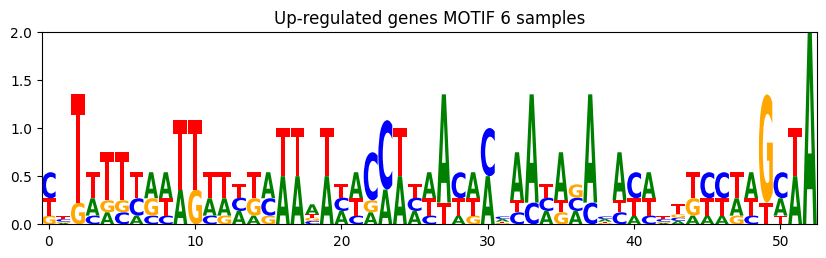

In [ ]:
import matplotlib.pyplot as plt

logo = dna_motif(up_df)

plt.title('Up-regulated genes MOTIF '+ str(len(up_df)) + ' samples')
plt.ylim(0, 2)
plt.savefig("/content/up_reg_genes_motif.png", dpi=300, format="png")

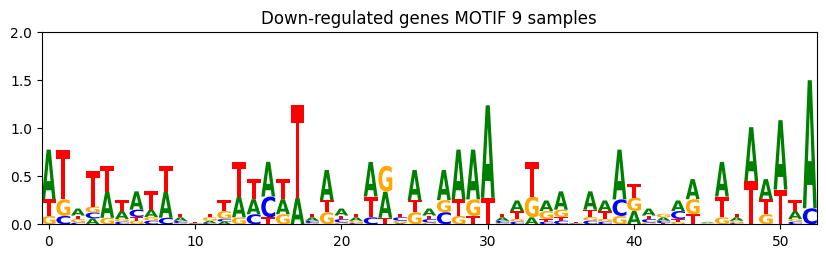

In [ ]:
logo = dna_motif(down_df)

plt.title('Down-regulated genes MOTIF '+ str(len(down_df)) + ' samples')
plt.ylim(0, 2)
plt.savefig("/content/down_reg_genes_motif.png", dpi=300, format="png")

#CONCLUSION:

- I cannot extract an obvious pattern from the analysis of DNA MOTIFS in the 5' UTR region of the up/down regulated genes.
- I have learned to use various tools such as KEGG, DNA MOTIF, RNA-SEQ DESEQ2.
- I have extensively utilized my pandas skills.

This pipeline addresses questions such as:

- Identifying MOTIFs in various sequences, including 5' UTR, promoters, RBS, etc.
- Cross-referencing these data with transcriptomes to identify regulatory regions.
- Identifying protein-binding regions for regulatory proteins.